<a id='top'></a>
<h1>Table of Contents</h1>
<ol>
    <li><a href="#section1">Project Introduction</a></li>
    <li><a href="#section2">Data Preparation & Cleaning</a></li>
    <ol>
        <li><a href="#section2_1">Columns Removal</a></li>
        <li><a href="#section2_2">Dealing with Missing Data</a></li>
        <li><a href="#section2_3">Dealing with Non-Numeric Columns</a></li>
        <li><a href="#section2_4">Data Quality Check</a></li>
    </ol>    
    <li><a href="#section3">Exploratory Data Analysis</a></li>
    <ol>
        <li><a href="#section3_1">Data Distribution</a></li>
        <li><a href="#section3_2">Business-Related Data Analysis</a></li>
        <ol>
        <li><a href="#section3_2_1">Analysis of the Number of Listings</a></li>
        <li><a href="#section3_2_2">Analysis of the Occupancy Rates</a></li>
        <li><a href="#section3_2_3">Analysis of the Prices</a></li>    
        </ol>    
    </ol>    
    <li><a href="#section4">Modelling</a></li>
    <ol>
        <li><a href="#section4_1">Feature Engineering</a></li>
        <ol>
            <li><a href="#section4_1_1">Feature: neighbourhood_cleansed</a></li>
            <li><a href="#section4_1_2">Feature: host_is_superhost</a></li>
            <li><a href="#section4_1_3">Feature: property_type</a></li>
            <li><a href="#section4_1_4">Feature: bathrooms_text</a></li>
            <li><a href="#section4_1_5">Feature: amenities</a></li>
            <li><a href="#section4_1_6">Target: price</a></li>
        </ol> 
        <li><a href="#section4_2">Training</a></li>
        <li><a href="#section4_3">Evaluation</a></li>
        <li><a href="#section4_4">Deployment</a></li>
    </ol>    
</ol>

<a id='section1'></a>
# 1. Project Introduction

In [ ]:
#IMPORTS
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

#CONFIGS
pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)

<a id='section2'></a>
# 2. Data Preparation & Cleaning
A data dictionary of the listings.csv dataset can be found [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596).

In [2]:
# import listings files
listings_df_202303 = pd.read_csv("input-data\\202303-listings.csv")
listings_df_202212 = pd.read_csv("input-data\\202212-listings.csv")
listings_df_202209 = pd.read_csv("input-data\\202209-listings.csv")
listings_df_202206 = pd.read_csv("input-data\\202206-listings.csv")

listings_df_202303["file_name"] = "202303-listings.csv"
listings_df_202212["file_name"] = "202212-listings.csv"
listings_df_202209["file_name"] = "202209-listings.csv"
listings_df_202206["file_name"] = "202206-listings.csv"

listings_df_ls = [listings_df_202303, listings_df_202212, listings_df_202209, listings_df_202206]

<a id='section2_1'></a>
## 2.1. Columns Removal
In this step I will remove columns which do not include relevant information for this project. I considered the following types of columns as not relevant:
1. It contains meta information about the listing like URL or description (this one could be important if NLP analysis was in scope);
2. Technical columns like scrape ID or date;
3. Personal data like name of the host;
4. Host-related data, since it is not relevant for the purpose of this analysis;
5. Columns with a high number of nulls;
6. Other columns which I considered too specific for the purpose of this analysis.

In [3]:
listings_df_ls[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12410 entries, 0 to 12409
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            12410 non-null  int64  
 1   listing_url                                   12410 non-null  object 
 2   scrape_id                                     12410 non-null  int64  
 3   last_scraped                                  12410 non-null  object 
 4   source                                        12410 non-null  object 
 5   name                                          12410 non-null  object 
 6   description                                   12405 non-null  object 
 7   neighborhood_overview                         7608 non-null   object 
 8   picture_url                                   12410 non-null  object 
 9   host_id                                       12410 non-null 

In [4]:
def drop_cols(df, col_list):
    """
    Description
    -----------
    This function drops a specified list of columns for a given pandas DataFrame. The columns in the list must do not necessarily need to exist in the DataFrame.  
    
    Arguments
    ---------
    df: pandas DataFrame
        a pandas DataFrame from which the columns should be removed.

    col_list: list
        a list of columns to be removed from the pandas DataFrame.

    Returns
    -------
    df: pandas DataFrame
        a pandas DataFrame with the columns removed which were found in the list.
    """   
    
    for col in col_list:
        if col in df.columns:
            df = df.drop(col, axis=1)
            
    return df

In [5]:
drop_col_ls = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
               'description', 'neighborhood_overview', 'picture_url', 'host_url',
               'host_name','host_since', 'host_location', 'host_about','host_response_time', 
               'host_response_rate', 'host_acceptance_rate','host_thumbnail_url', 'host_picture_url',
               'host_neighbourhood', 'host_total_listings_count','host_verifications','host_has_profile_pic', 
               'host_listings_count', 'host_identity_verified', 'neighbourhood','bathrooms','minimum_nights',
               'maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
               'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated',
               'has_availability','availability_30','availability_60','availability_365','number_of_reviews_ltm',
               'number_of_reviews_l30d','first_review','last_review','review_scores_accuracy',
               'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
               'review_scores_location','review_scores_rating','instant_bookable','license',
               'calculated_host_listings_count','calculated_host_listings_count_entire_homes', 
               'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
               'reviews_per_month']

# remove the columns for each DataFrame in the list
for i in range(0, len(listings_df_ls)):
    listings_df_ls[i] = drop_cols(listings_df_ls[i], drop_col_ls)

#### <a href="#top">Back to top</a>

<a id='section2_2'></a>
## 2.2. Dealing with Missing Data

In [6]:
# Print the number of nulls per column for each DataFrame
for i in range(0, len(listings_df_ls)):
    print(f"""TABLE NAME: {listings_df_ls[i]["file_name"].unique()[0]}""")
    print("------------------------------------------------------------\n")
    print(listings_df_ls[i].isnull().sum())
    print("\n------------------------------------------------------------\n")

TABLE NAME: 202303-listings.csv
------------------------------------------------------------

id                                 0
host_id                            0
host_is_superhost                  0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                    14
bedrooms                        1294
beds                              87
amenities                          0
price                              0
availability_90                    0
calendar_last_scraped              0
number_of_reviews                  0
review_scores_value             1622
file_name                          0
dtype: int64

------------------------------------------------------------

TABLE NAME: 202212-listings.csv
----------------------------------------------------------

It is possible to see that list of columns with missing data is similar for each DataFrame, so the chosen approaches will be used for all of the DataFrames.

For the purpose of the exploratory data analysis I decided to __address__ the following columns:
- bedrooms
- beds

For the purpose of the exploratory data analysis I decided to __ignore__ the following columns:
- host_is_superhost
- bathrooms_text
- review_scores_value

#### Procedure
Since the column _accomodates_ is always filled I simply used the __mode__ of the available data within the column to be treated while accounting for each corresponding value inside the column _accomodates_.

In [7]:
def fill_data_with_mode(df, ref_col, col_list):
    """
    Description
    -----------
    This function fills in missing data for a given list of columns in a pandas DataFrame based on the mode available in the missing column for a particular group of values available on a specified reference column.
    
    Arguments
    ---------
    df: pandas DataFrame
        a pandas DataFrame in which the missing data will be filled.
        
    ref_col: string
        the name of the reference column, from which the value group will be used to calculate the mode.
        
    col_list: list
        a list of columns with missing data.

    Returns
    -------
    df: pandas DataFrame
        a pandas DataFrame with the filled missing data.
    """   
    
    for col in col_list:
        mode_per_group = df.groupby(ref_col)[col].transform(lambda x: x.mode()[0])
        df[col] = df[col].fillna(mode_per_group)
    
    return df

In [8]:
ref_col = "accommodates"
missing_col_ls = ["bedrooms","beds"]

# fill in the missing data
for i in range(0, len(listings_df_ls)):
    listings_df_ls[i] = fill_data_with_mode(listings_df_ls[i],ref_col,missing_col_ls)

# quality check for missing data
print(f"""Missing data in bedrooms: {listings_df_ls[0]["bedrooms"].isnull().sum()}""")
print(f"""Missing data in bedrooms: {listings_df_ls[0]["beds"].isnull().sum()}""")    

Missing data in bedrooms: 0
Missing data in bedrooms: 0


#### <a href="#top">Back to top</a>

<a id='section2_3'></a>
## 2.3. Dealing with Non-Numeric Columns
In this section the were checked for inconsistencies and when necessary converted into a different data type in order to facilitate analysis.

In [9]:
listings_df_ls[0].tail(2)

,id,host_id,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,availability_90,calendar_last_scraped,number_of_reviews,review_scores_value,file_name
12408,2643760,4287899,t,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória",PORTO,41.14407,-8.61246,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Patio or balcony"", ""Wine glasses"", ""Bidet"", ""Elevator"", ""Cleaning products"", ""Dedicated workspace"", ""Coffee maker: Nespresso"", ""Clothing storage: closet"", ""Bathtub"", ""Paid parking on premises"", ""Bed linens"", ""Drying rack for clothing"", ""Dishwasher"", ""Heating"", ""Kitchen"", ""Toaster"", ""Essentials"", ""Fire extinguisher"", ""Oven"", ""Self check-in"", ""Microwave"", ""Hot water kettle"", ""Refrigerator"", ""Shampoo"", ""Hot water"", ""Coffee"", ""Iron"", ""Stove"", ""Smoking allowed"", ""Dishes and silverware"", ""Hangers"", ""Freezer"", ""Hair dryer"", ""Smart lock"", ""Dining table"", ""Washer"", ""First aid kit"", ""TV with standard cable"", ""Long term stays allowed"", ""Portable air conditioning"", ""Wifi"", ""Cooking basics"", ""Extra pillows and blankets"", ""Body soap"", ""Smoke alarm"", ""Shower gel""]",$70.00,34,2023-03-18,231,4.76,202303-listings.csv
12409,24408708,184264583,f,Aguçadoura e Navais,PÓVOA DE VARZIM,41.42545,-8.77694,Entire home,Entire home/apt,10,2 baths,3.0,5.0,"[""Crib"", ""Wine glasses"", ""Bidet"", ""Room-darkening shades"", ""Children\u2019s books and toys"", ""Free street parking"", ""High chair"", ""Private outdoor pool - available seasonally"", ""Dryer"", ""Coffee maker"", ""Bathtub"", ""Bed linens"", ""Drying rack for clothing"", ""Kitchen"", ""Private entrance"", ""Free parking on premises"", ""Laundromat nearby"", ""Table corner guards"", ""Baby bath"", ""Toaster"", ""Essentials"", ""Waterfront"", ""Barbecue utensils"", ""Fire extinguisher"", ""Clothing storage: closet and dresser"", ""Oven"", ""Outdoor furniture"", ""Microwave"", ""Children\u2019s dinnerware"", ""Hot water kettle"", ""Paid parking off premises"", ""Wifi \u2013 48 Mbps"", ""Ethernet connection"", ""Security cameras on property"", ""Private patio or balcony"", ""Refrigerator"", ""Hot water"", ""Luggage dropoff allowed"", ""Iron"", ""Bikes"", ""Stove"", ""Dishes and silverware"", ""Hangers"", ""Freezer"", ""Host greets you"", ""Pack \u2019n play/Travel crib"", ""60\"" HDTV with standard cable"", ""Hair dryer"", ""Private backyard \u2013 Fully fenced"", ""Dining table"", ""Baking sheet"", ""First aid kit"", ""Beach access \u2013 Beachfront"", ""Free washer \u2013 In building"", ""Outdoor dining area"", ""Pets allowed"", ""Long term stays allowed"", ""Outlet covers"", ""Cooking basics"", ""BBQ grill"", ""Extra pillows and blankets"", ""Fireplace guards""]",$95.00,53,2023-03-18,27,4.44,202303-listings.csv


__neighbourhood_cleansed:__

In [10]:
print(listings_df_ls[0]['neighbourhood_cleansed'].unique())

['Paranhos' 'Lordelo do Ouro e Massarelos' 'Bonfim'
 'Matosinhos e Leça da Palmeira' 'Ramalde' 'Canidelo' 'Arcozelo'
 'Mafamude e Vilar do Paraíso' 'Aldoar, Foz do Douro e Nevogilde'
 'Santa Marinha e São Pedro da Afurada'
 'São Mamede de Infesta e Senhora da Hora' 'Árvore'
 'St. Tirso, Couto (S. Cristina e S. Miguel) e Burgães' 'Valongo'
 'Baguim do Monte (Rio Tinto)' 'Recarei'
 'Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória' 'Arouca e Burgo'
 'Várzea' 'Santa Maria da Feira, Travanca, Sanfins e Espargo' 'São Roque'
 'Gondomar (São Cosme), Valbom e Jovim' 'Santa Maria de Lamas'
 'AVer-o-Mar, Amorim e Terroso' 'Canelas e Espiunca' 'Aguçadoura e Navais'
 'Balazar' 'Vila do Conde'
 'O. Azeméis, Riba-Ul, Ul, Macinhata da Seixa, Madail'
 'Custóias, Leça do Balio e Guifões' 'Gulpilhares e Valadares'
 'Póvoa de Varzim, Beiriz e Argivai' 'São Félix da Marinha' 'Rio Tinto'
 'Vila Chã, Codal e Vila Cova de Perrinho' 'Espinho' 'Oliveira do Douro'
 'Campanhã' 'Milheirós de Poiares' 'Touguin

Nothing unusual with the column _neighbourhood_cleansed_.

__neighbourhood_group_cleansed:__

In [11]:
print(listings_df_ls[0]['neighbourhood_group_cleansed'].unique())

['PORTO' 'MATOSINHOS' 'VILA NOVA DE GAIA' 'VILA DO CONDE' 'SANTO TIRSO'
 'VALONGO' 'GONDOMAR' 'PAREDES' 'AROUCA' 'SANTA MARIA DA FEIRA'
 'OLIVEIRA DE AZEMÉIS' 'PÓVOA DE VARZIM' 'VALE DE CAMBRA' 'ESPINHO' 'MAIA'
 'SÃO JOÃO DA MADEIRA' 'TROFA']


Nothing unusual with the column _neighbourhood_group_cleansed_.

__property_type:__

In [12]:
print(listings_df_ls[0]['property_type'].unique())

['Shared room in rental unit' 'Shared room in home'
 'Private room in rental unit' 'Entire rental unit' 'Entire loft'
 'Entire condo' 'Entire home' 'Private room in townhouse' 'Entire cabin'
 'Treehouse' 'Entire vacation home' 'Entire villa' 'Private room in home'
 'Private room' 'Private room in guesthouse' 'Entire townhouse'
 'Room in hotel' 'Camper/RV' 'Entire place' 'Entire serviced apartment'
 'Room in boutique hotel' 'Room in aparthotel' 'Entire cottage'
 'Private room in villa' 'Entire bungalow' 'Private room in condo'
 'Tiny home' 'Shared room in bed and breakfast'
 'Private room in bed and breakfast' 'Private room in casa particular'
 'Private room in earthen home' 'Casa particular' 'Private room in hostel'
 'Shared room in hostel' 'Entire guesthouse' 'Private room in boat' 'Boat'
 'Earthen home' 'Room in serviced apartment' 'Room in hostel'
 'Private room in guest suite' 'Farm stay' 'Private room in nature lodge'
 'Entire guest suite' 'Private room in loft' 'Private room in b

Nothing unusual with the column _property_type_.

__bathrooms_text:__

In [13]:
print(listings_df_ls[0]['bathrooms_text'].unique())

['1.5 shared baths' '2 shared baths' '1 private bath' '3 shared baths'
 '1 bath' '2 baths' '1 shared bath' '5 baths' '3 baths' '6 baths'
 '1.5 baths' '7 baths' '4 baths' '3.5 baths' '0 baths' '5.5 baths'
 '2.5 baths' '8 baths' '11 baths' '9 baths' '3.5 shared baths' '4.5 baths'
 nan '0 shared baths' '2.5 shared baths' 'Shared half-bath' '6.5 baths'
 'Half-bath' '4 shared baths' '8.5 baths' '7.5 shared baths'
 '5 shared baths' '6 shared baths' '4.5 shared baths' '7.5 baths'
 '10 baths' 'Private half-bath' '16 baths' '10.5 baths']


Nothing unusual with the column _bathrooms_text_.

__price:__ this column needs to be converted to integer for a proper analysis.

In [14]:
for i in range(0, len(listings_df_ls)):
    listings_df_ls[i]['price_usd'] = listings_df_ls[i]['price'].str.replace('[^\d.]', '', regex=True).astype(float)
    
listings_df_ls[0][['price', 'price_usd']].tail()

,price,price_usd
12405,$148.00,148.0
12406,$102.00,102.0
12407,$150.00,150.0
12408,$70.00,70.0
12409,$95.00,95.0


__availability_90:__ based on this column it is possible to calculate the ocupancy rate, which allows for a more intuitive analysis.

In [15]:
for i in range(0, len(listings_df_ls)):
    listings_df_ls[i]['occupancy_rate_90'] = (1 - (listings_df_ls[i]['availability_90'] / 90))

listings_df_ls[0][['occupancy_rate_90','availability_90']].head(3)

,occupancy_rate_90,availability_90
0,0.200000,72
1,0.522222,43
2,0.266667,66


__calendar_last_scraped:__ this column needs to be converted to a date type for a proper analysis and rounded down to the beginning of the month, because there may be multiple different scrape dates for the same batch. Afterwards a categorical column _period_ will be created for better interpretability in the visualizations.

In [16]:
listings_df_ls[0]['calendar_last_scraped'].value_counts()

2023-03-17    12397
2023-03-18       13
Name: calendar_last_scraped, dtype: int64

In [17]:
for i in range(0, len(listings_df_ls)):
    listings_df_ls[i]['calendar_last_scraped'] = pd.to_datetime(listings_df_ls[i]['calendar_last_scraped'], format='%Y-%m-%d') - pd.offsets.MonthBegin(1)

listings_df_ls[0]['calendar_last_scraped'].head()

0   2023-03-01
1   2023-03-01
2   2023-03-01
3   2023-03-01
4   2023-03-01
Name: calendar_last_scraped, dtype: datetime64[ns]

In [18]:
index_mapping = {"2022-06-01" : "2022 Q2",
                 "2022-09-01" : "2022 Q3",
                 "2022-12-01" : "2022 Q4",
                 "2023-03-01" : "2023 Q1"}

for i in range(0, len(listings_df_ls)):
    listings_df_ls[i]['period'] = listings_df_ls[i]['calendar_last_scraped'].astype(str).replace(index_mapping)
    
listings_df_ls[0][["calendar_last_scraped","period"]].head()

,calendar_last_scraped,period
0,2023-03-01,2023 Q1
1,2023-03-01,2023 Q1
2,2023-03-01,2023 Q1
3,2023-03-01,2023 Q1
4,2023-03-01,2023 Q1


#### <a href="#top">Back to top</a>

<a id='section2_4'></a>
## 2.4. Data Quality Check
Since I am going to focus the analysis of ocupancy rates baed on the column _availability_90_, I wanted to make a quick quality check to see if the data matches with the day-by-day availabiliy data in the calendar.csv for a speficic listing ID. I simply chose the first ID available: 840535633089695952.

In [19]:
#print 90-days' availability data in the 202303-listings.csv
listings_df_202303[listings_df_202303["id"] == 840535633089695952][["id","availability_90"]].head()

,id,availability_90
0,840535633089695952,72


In [20]:
#import calendar data for 2023
calendar_df_202303 = pd.read_csv("input-data\\202303-calendar.csv")
calendar_df_202303['date'] = pd.to_datetime(calendar_df_202303['date'])

#filter the date for the listing id and the next 90 days
start_date = min(calendar_df_202303['date']) #date of the extract
end_date = start_date + pd.DateOffset(days=90) #90 days after

id_filter = calendar_df_202303["listing_id"] == 840535633089695952
date_filter = (calendar_df_202303["date"] >= start_date) & (calendar_df_202303["date"] < end_date)
combined_filter = id_filter & date_filter

filtered_calendar_df_202303 = calendar_df_202303[combined_filter]

nr_available_days = len(filtered_calendar_df_202303[filtered_calendar_df_202303["available"] == "t"])
print(f"""The listing id {str(filtered_calendar_df_202303["listing_id"].unique()[0])} was {nr_available_days} days available between {str(start_date)[:10]} and {str(end_date)[:10]}.""")

The listing id 840535633089695952 was 72 days available between 2023-03-17 and 2023-06-15.


#### <a href="#top">Back to top</a>

<a id='section3'></a>
# 3. Exploratory Data Analysis
With the relevant columns cleaned and treated, in this section I started to look at the distribution of some features, calculated some interesting statistics and looked at the evolution of some values using the 12-month data.

<a id='section3_1'></a>
## 3.1. Data Distribution

In [21]:
# Print the summary statistics of the relevant nummeric columns
listings_df_ls[0][["accommodates","bedrooms","beds","occupancy_rate_90","price_usd","number_of_reviews","review_scores_value"]].describe()

,accommodates,bedrooms,beds,occupancy_rate_90,price_usd,number_of_reviews,review_scores_value
count,12410.000000,12410.000000,12410.000000,12410.000000,12410.00000,12410.000000,10788.000000
mean,3.695165,1.504432,2.229170,0.540101,116.43747,51.361563,4.651350
std,2.140594,0.954702,1.664315,0.320422,1266.15990,81.257677,0.371134
min,1.000000,1.000000,1.000000,0.000000,9.00000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.266667,50.00000,3.000000,4.550000
50%,3.000000,1.000000,2.000000,0.544444,69.00000,18.000000,4.740000
75%,4.000000,2.000000,3.000000,0.822222,98.00000,63.000000,4.860000
max,16.000000,16.000000,23.000000,1.000000,80100.00000,833.000000,5.000000


__Observation__: By looking at the quantiles and the standard deviations we can see that we are dealing with some extreme values, like for example the price or the number of reviews. It is therefore important to chose the statistic most appropriate - in this case the __median__ (50%-quantile) would be a better choise than the mean.

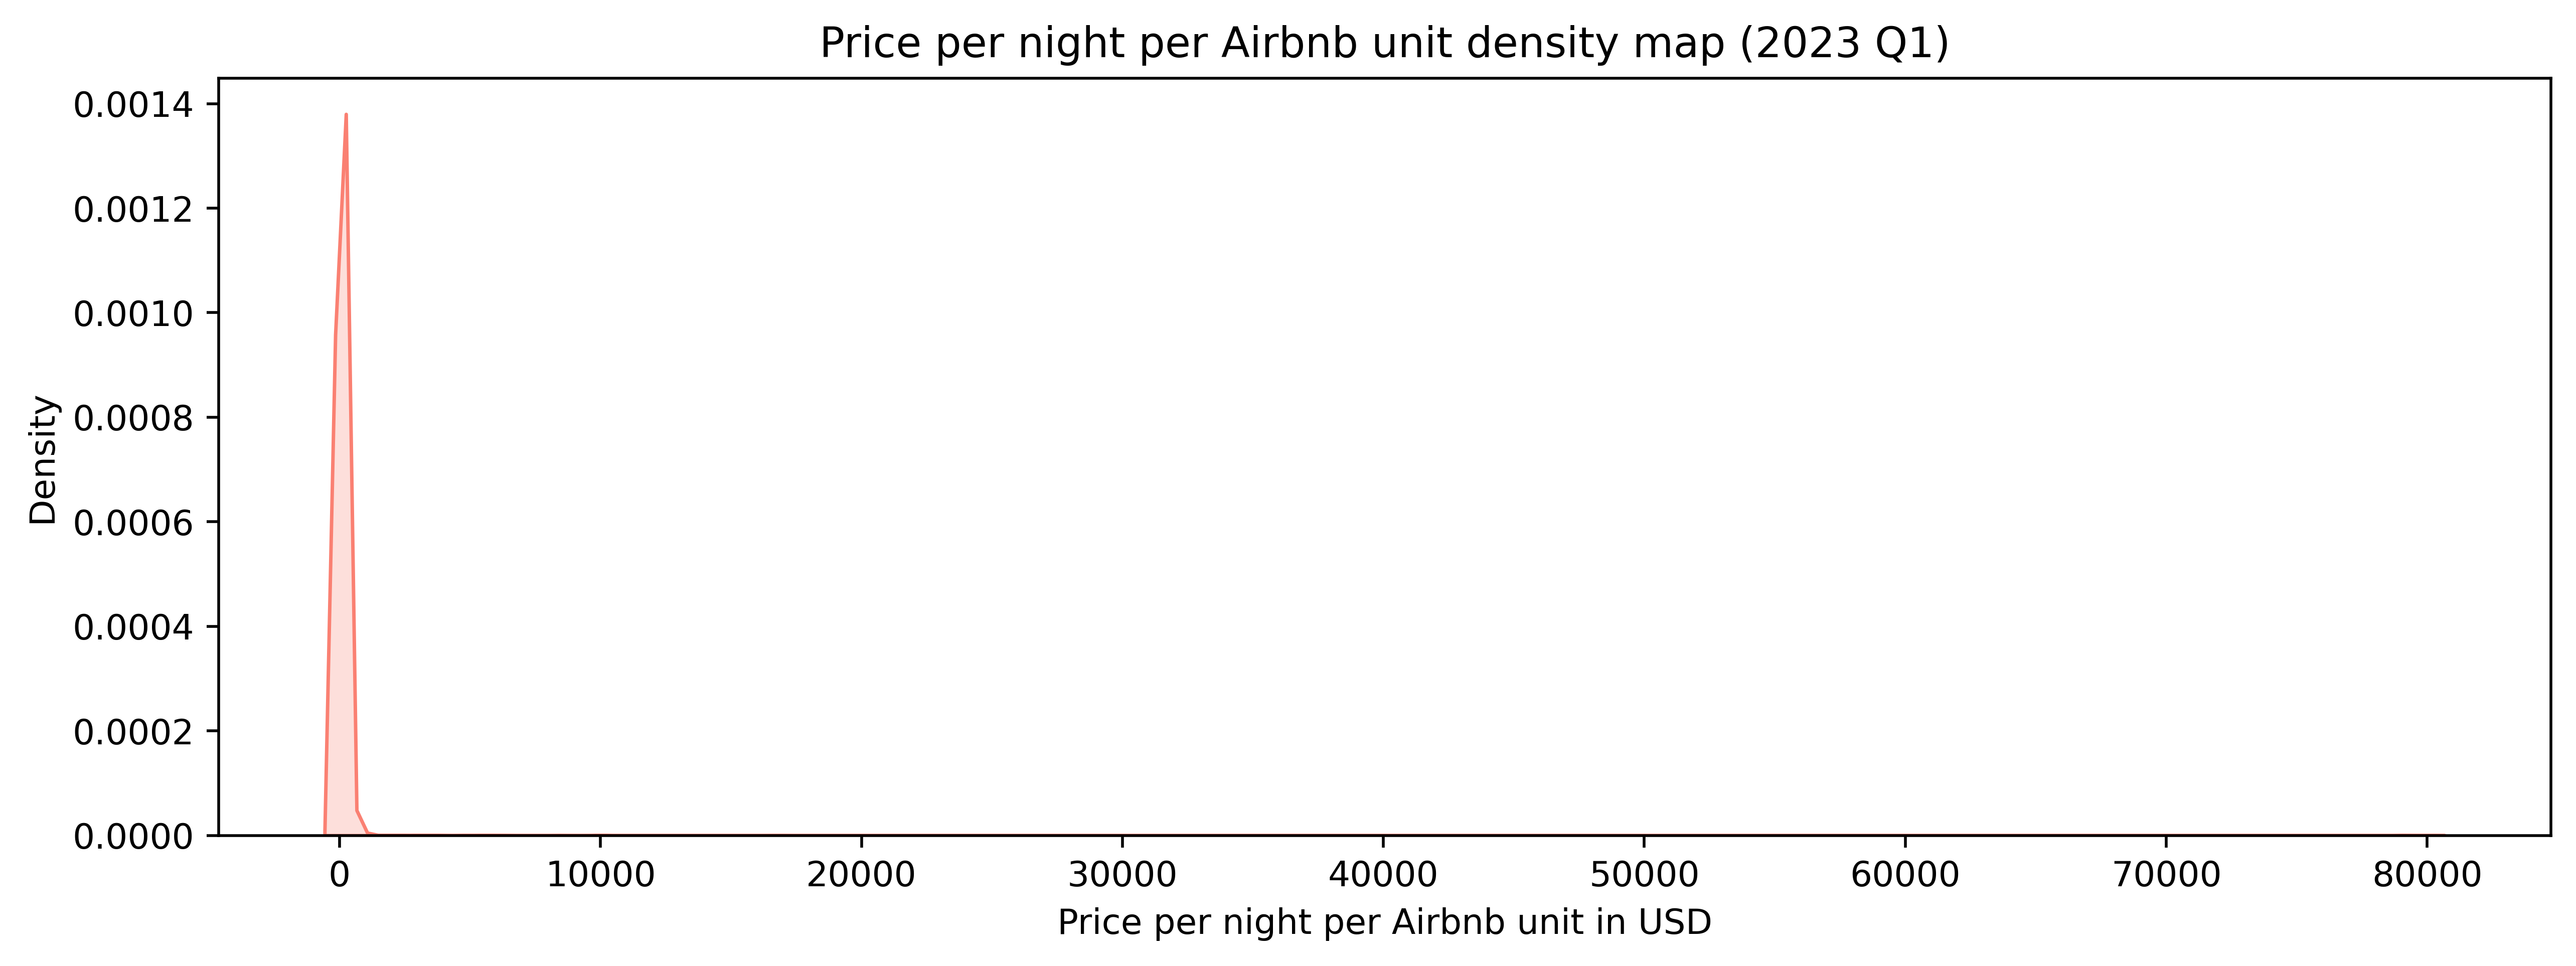

In [22]:
#Print the price distribution
plt.figure(figsize=(12,4),dpi=500)
plt.xlabel('Price per night per Airbnb unit in USD')
plt.title('Price per night per Airbnb unit density map (2023 Q1)')

sns.kdeplot(x=listings_df_ls[0]["price_usd"],color="salmon", shade=True);

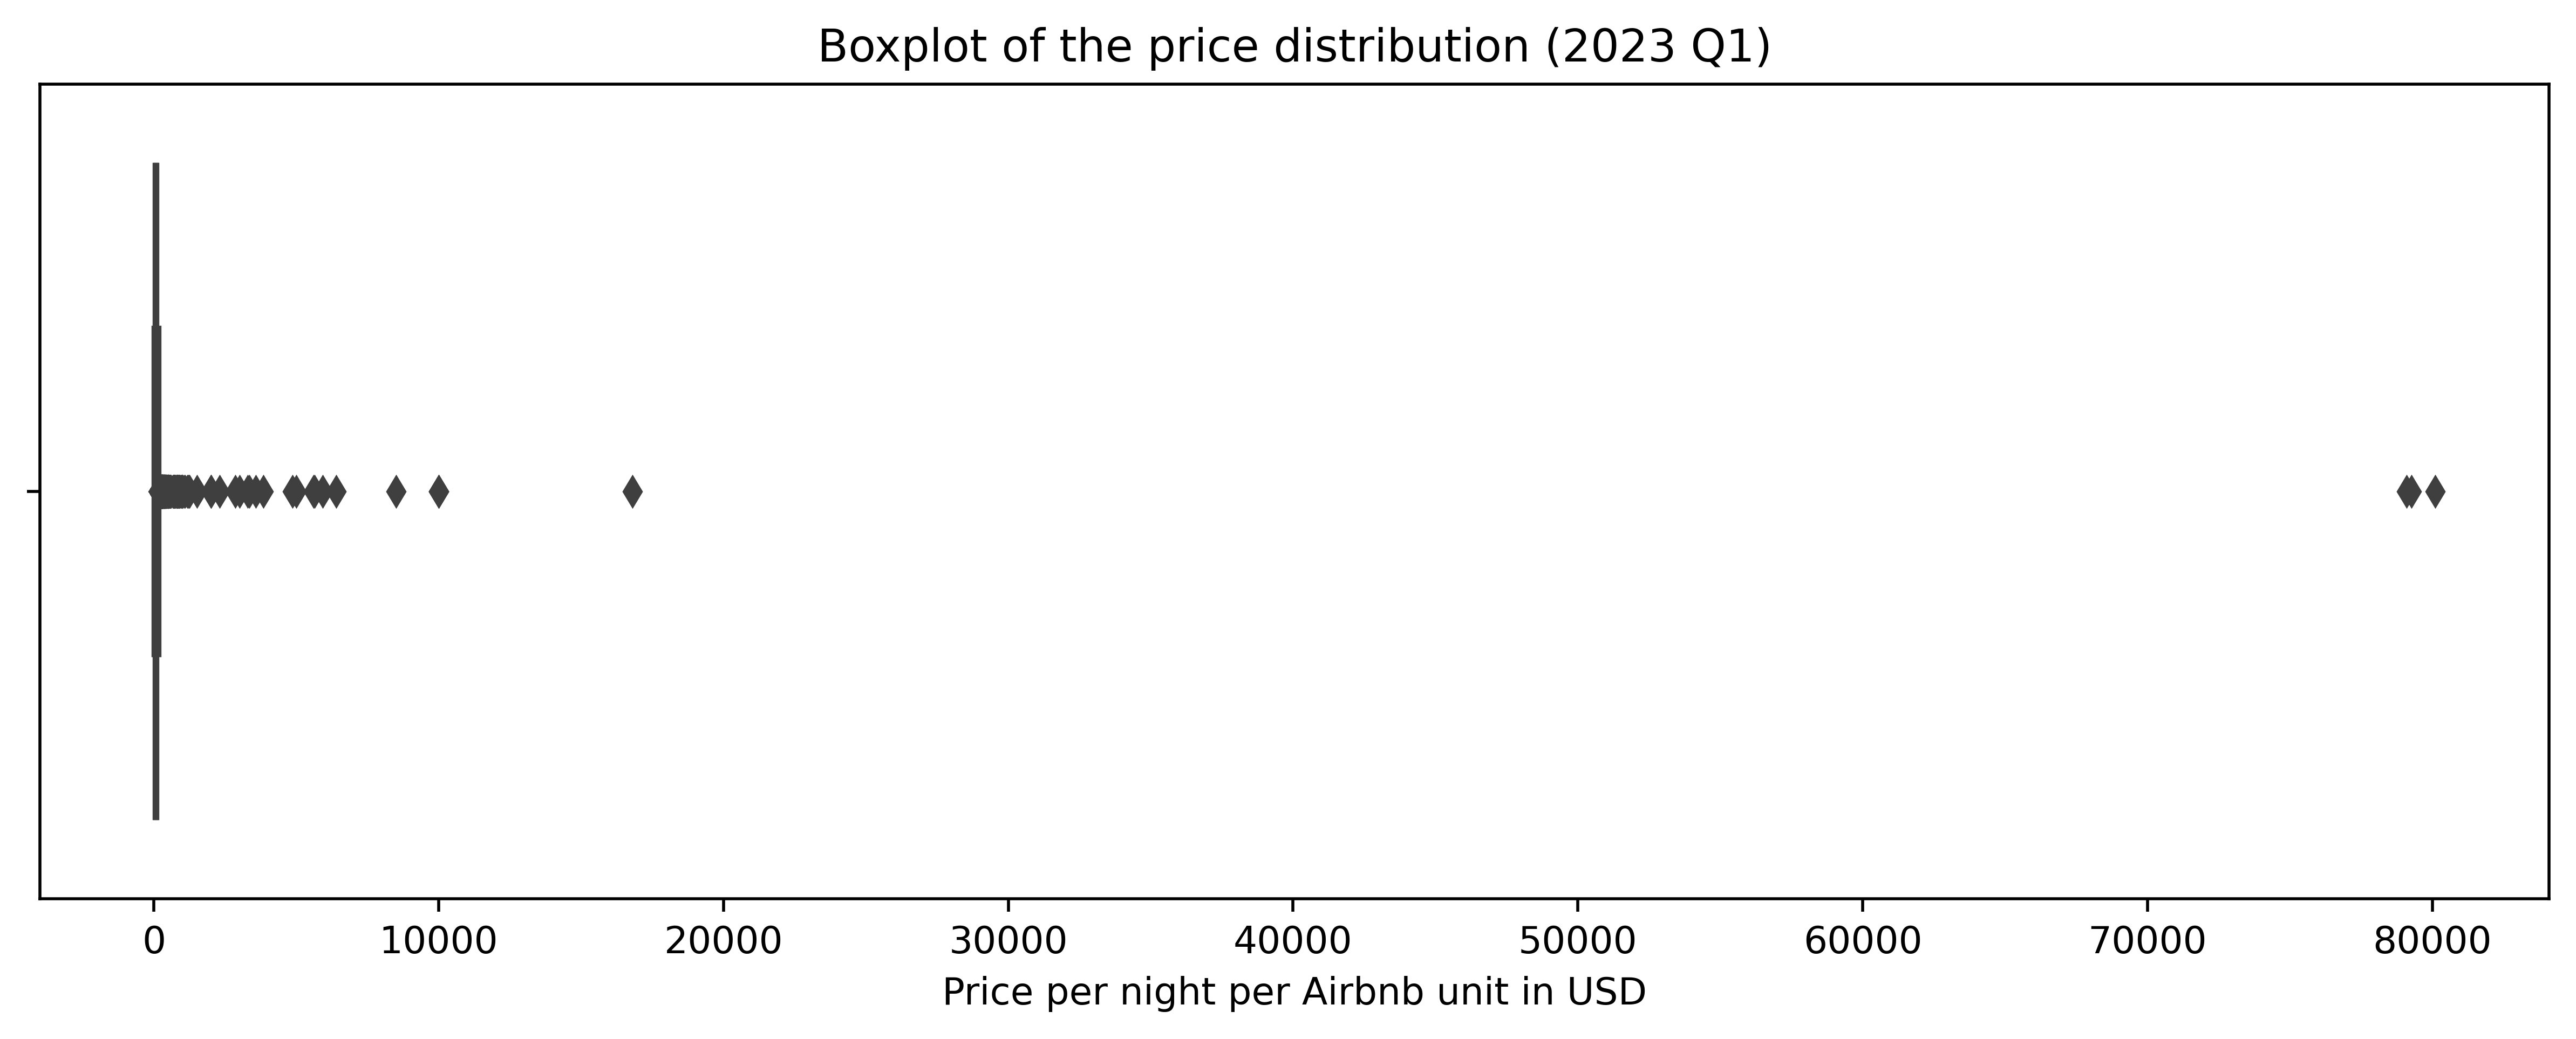

In [23]:
#Print the overall 90-day occupancy rate distribution
plt.figure(figsize=(12,4),dpi=500)

sns.boxplot(data=listings_df_ls[0], x="price_usd")

plt.title('Boxplot of the price distribution (2023 Q1)')
plt.xlabel('Price per night per Airbnb unit in USD');

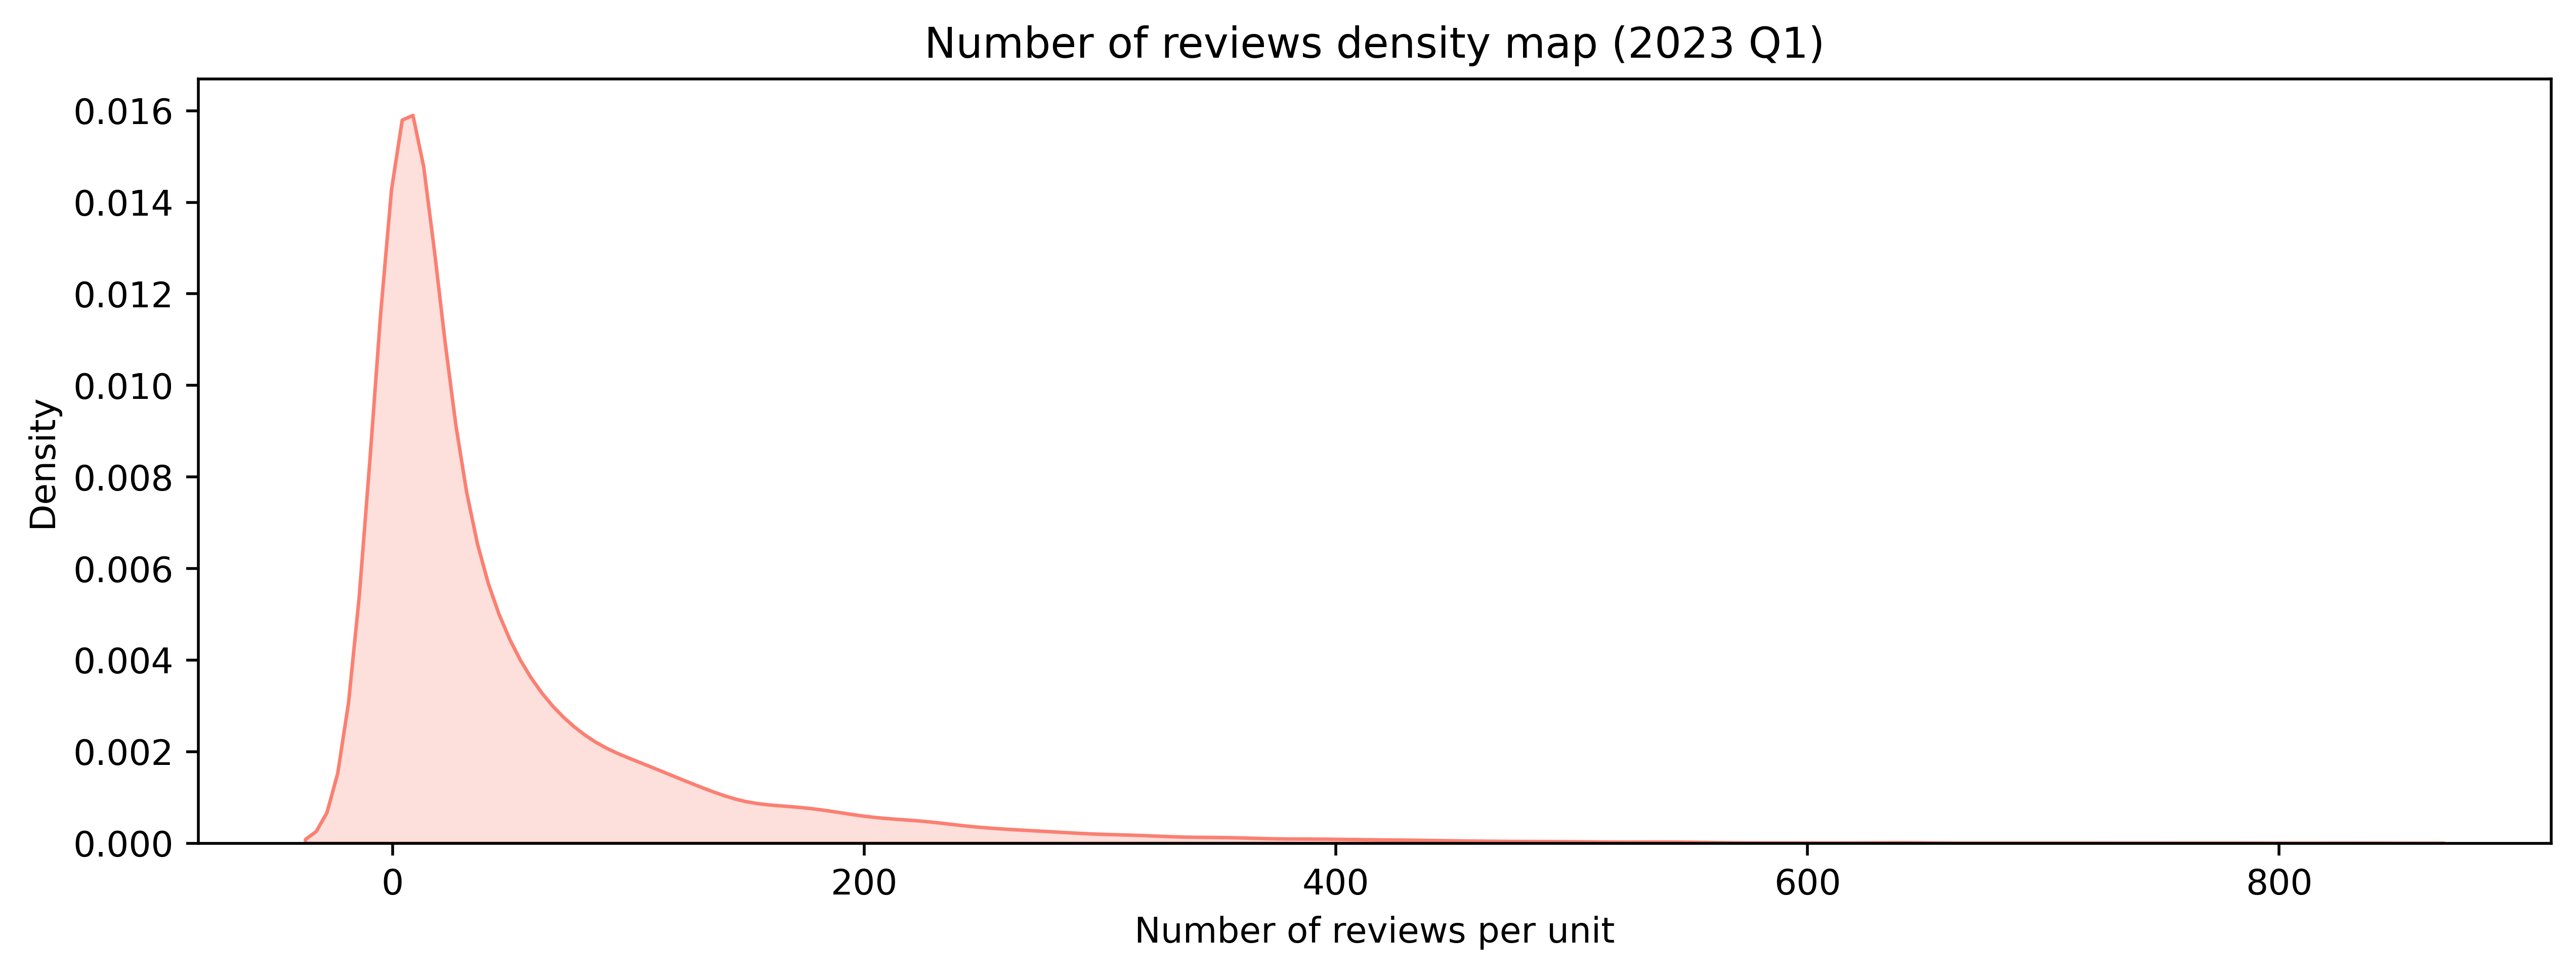

In [24]:
#Print the number of reviews per listing distribution
plt.figure(figsize=(12,4),dpi=500)
plt.xlabel('Number of reviews per unit')
plt.title('Number of reviews density map (2023 Q1)')

sns.kdeplot(x=listings_df_ls[0]["number_of_reviews"],color="salmon", shade=True);

Print the relation of number of reviews with the review score

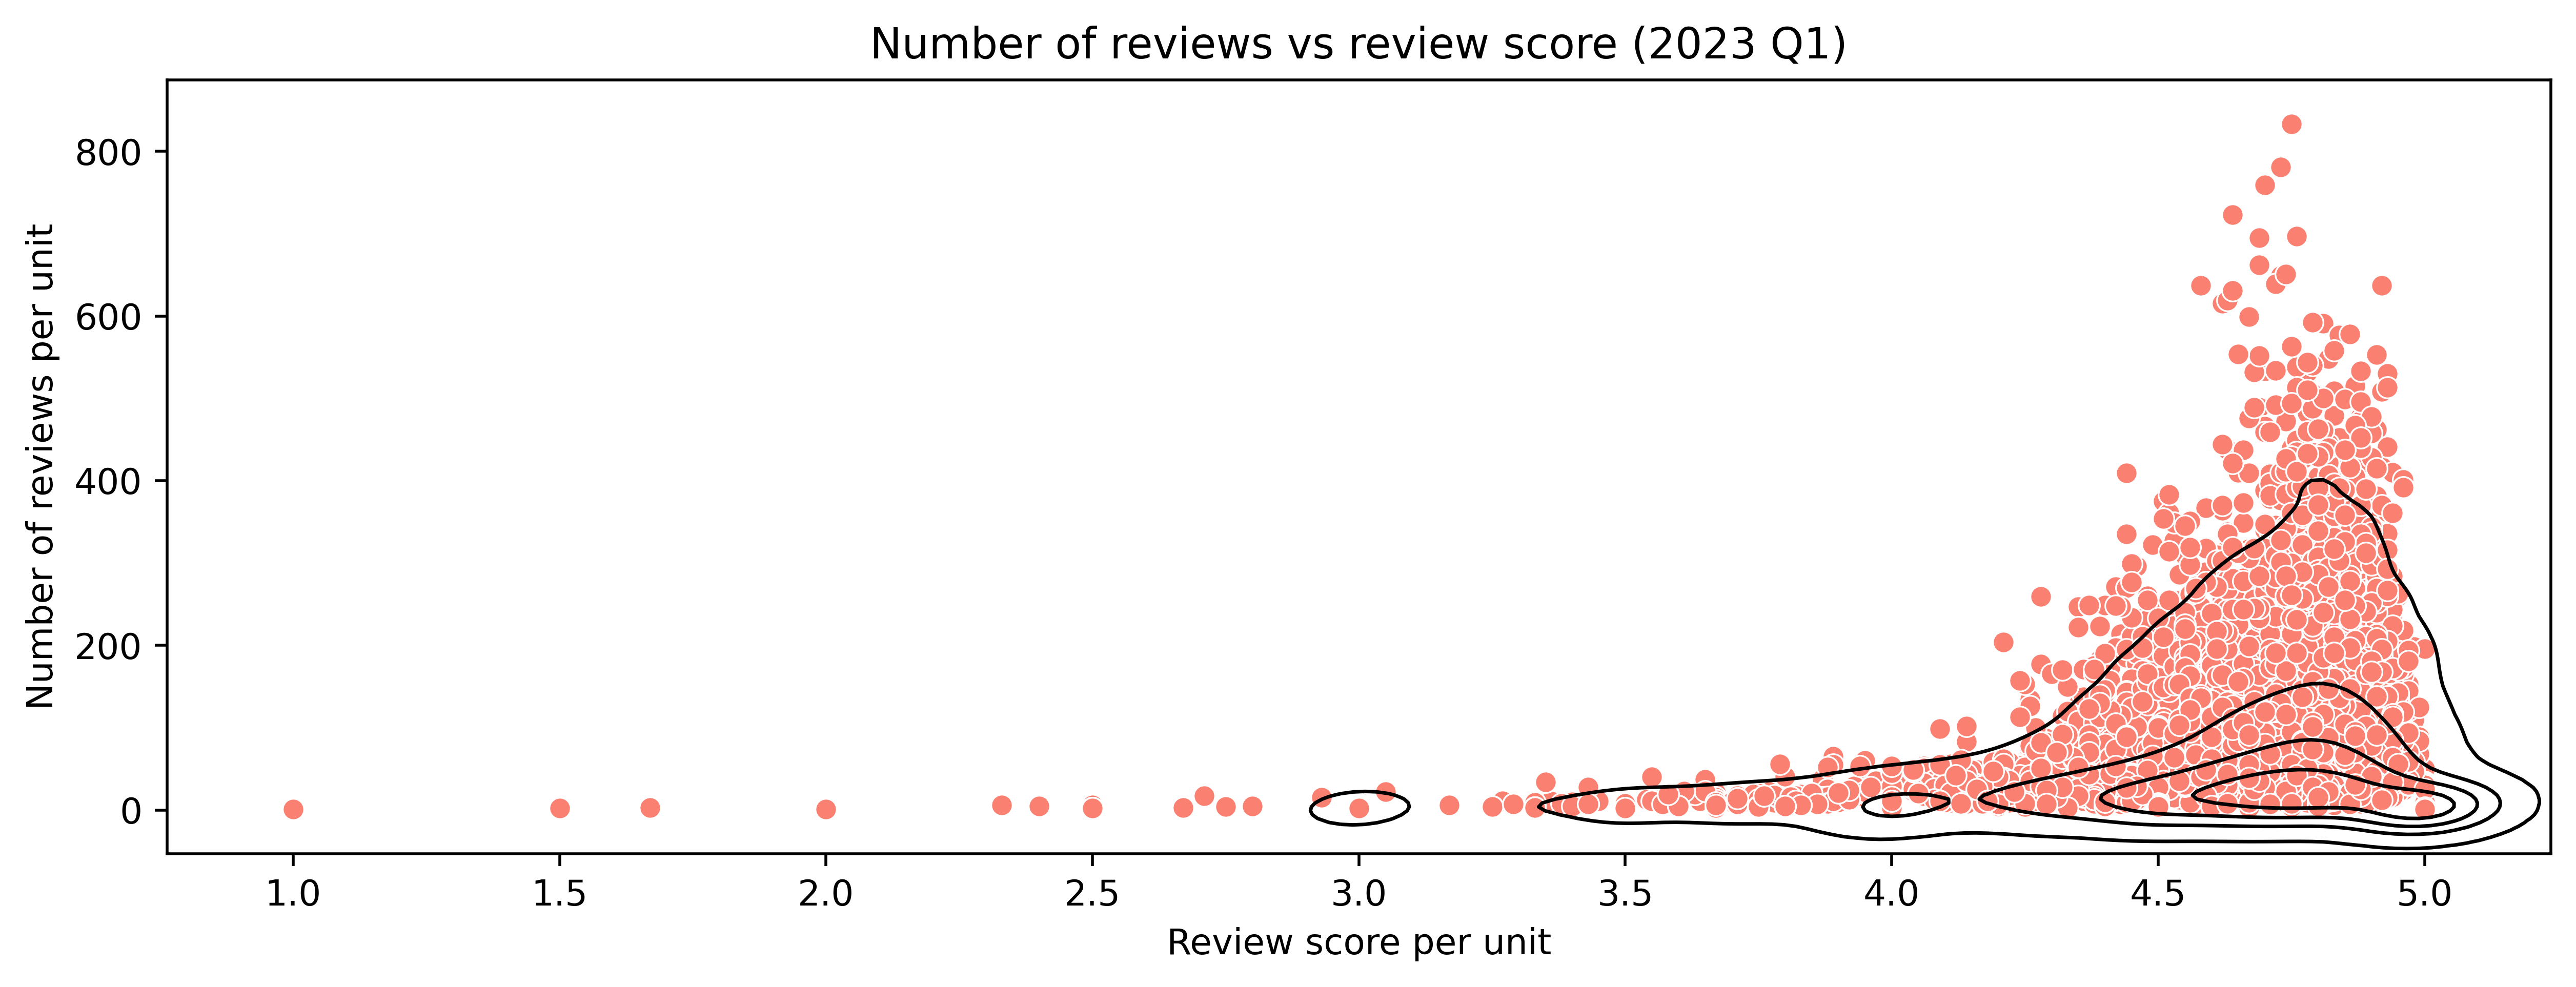

In [25]:
# print scatterplot with kdeplot for number of reviews vy review score 
plt.figure(figsize=(12,4),dpi=500)
plt.title('Number of reviews vs review score (2023 Q1)')
plt.xlabel('Review score per unit')
plt.ylabel('Number of reviews per unit')

sns.scatterplot(data=listings_df_ls[0],
                x="review_scores_value",
                y="number_of_reviews",
                color="salmon")

sns.kdeplot(data=listings_df_ls[0],
                x="review_scores_value",
                y="number_of_reviews", 
                levels=5, 
                color="black", 
                linewidths=1);

__Observation:__ It seems that there is not a strong relation which supports that as the number of review increases the average of the review score also increases. The highest concentration of highest reviews occurs between 1-200 reviews.
#### <a href="#top">Back to top</a>

<a id='section3_2'></a>
## 3.1. Business-Related Data Analysis

In [26]:
# merge in all dataframes into one
full_data_df = pd.concat(listings_df_ls, axis=0)

<a id='section3_2_1'></a>
### 3.1.1. Analysis of the Number of Listings

Print a bar chart with the number of listings by batch date

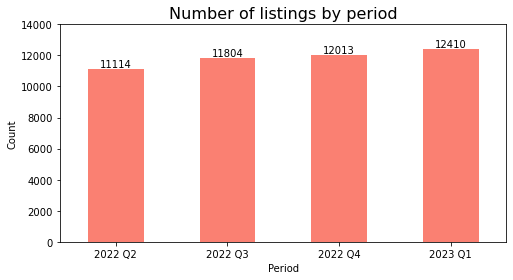

In [27]:
# create the count of listings by period and sort it by period rank
value_counts = full_data_df["period"].value_counts().sort_index()

# Plot the bar chat
plt.figure(figsize=(6,4))

ax = value_counts.plot.bar(figsize=(8,4),color="salmon",legend=False)

for i, value in enumerate(value_counts):
    ax.annotate(f"""{value}""", (i, value), ha='center', va='bottom')
        
ax.set_title("Number of listings by period", fontsize=16)
ax.set_xlabel("Period")
ax.set_ylabel("Count")
plt.ylim((0,14000))
plt.xticks(rotation=0)

plt.show()

__Observation__: It is possible to see a considerable increase in the number of listings considering the fact that these increases occur in just a 3-month period.

Print a table with the number of listings by batch date broken down by city

In [28]:
# create the count of listings by batch date by period
value_counts = full_data_df.groupby(["period", "neighbourhood_group_cleansed"]).size().unstack().sort_index()
value_counts = value_counts.T
value_counts.reset_index().sort_values("2023 Q1", ascending=False).style.hide_index()

neighbourhood_group_cleansed,2022 Q2,2022 Q3,2022 Q4,2023 Q1
PORTO,7960,8518,8901,9248
VILA NOVA DE GAIA,1200,1246,1285,1319
MATOSINHOS,445,468,482,500
VILA DO CONDE,277,299,289,285
PÓVOA DE VARZIM,296,294,246,256
AROUCA,151,156,136,136
GONDOMAR,112,124,119,126
ESPINHO,179,188,120,120
MAIA,92,95,89,89
VALE DE CAMBRA,65,73,60,62


__Observation__: The first thing I noticed here is again how skewed the data is. Secondly almost all of cities kept the increasing trend but some cities like Maia, Espinho, or Arouca show a decrease in the offerings. 

Let's see this in two graphics: one for the biggest cities in terms of oferigns and a second for the rest.

In [29]:
# create a separated Dataframe with the results from the table above
value_counts_by_city = value_counts.reset_index().sort_values("2023 Q1", ascending=False)
value_counts_by_city = value_counts_by_city.set_index('neighbourhood_group_cleansed')

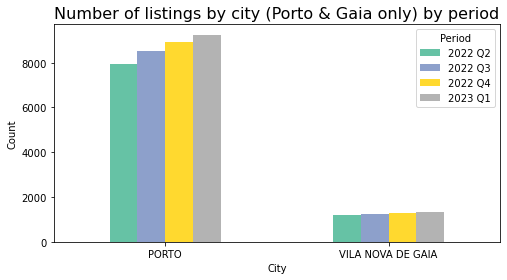

In [30]:
# Plot the 1st bar chat
ax = value_counts_by_city[value_counts_by_city.index.isin(["PORTO","VILA NOVA DE GAIA"])].plot.bar(figsize=(8,4), legend=True, cmap='Set2')

ax.set_title("Number of listings by city (Porto & Gaia only) by period", fontsize=16)
ax.set_xlabel("City")
ax.set_ylabel("Count")

plt.xticks(rotation=0)
plt.legend(title="Period")

plt.show()

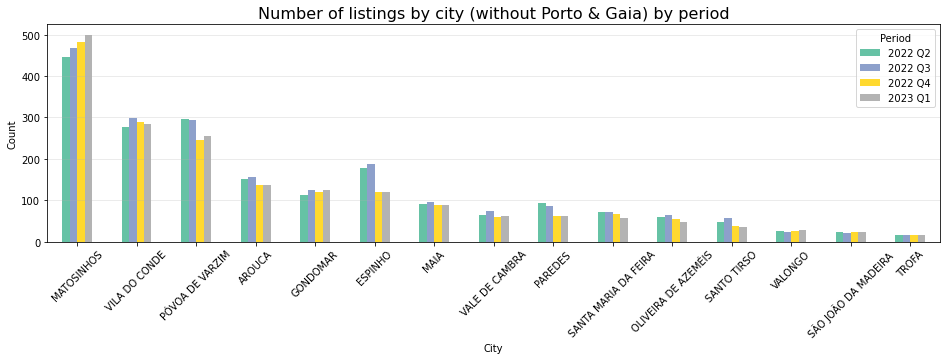

In [31]:
# Plot the 1st bar chat
ax = value_counts_by_city[~value_counts_by_city.index.isin(["PORTO","VILA NOVA DE GAIA"])].plot.bar(figsize=(16,4), legend=True, cmap='Set2')

ax.set_title("Number of listings by city (without Porto & Gaia) by period", fontsize=16)
ax.set_xlabel("City")
ax.set_ylabel("Count")

plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title="Period")

plt.show()

#### <a href="#top">Back to top</a>

<a id='section3_2_2'></a>
### Analysis of the Occupancy Rates

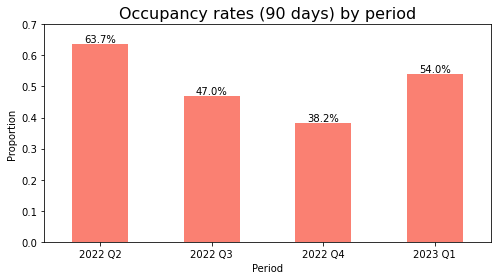

The overall mean of the 90-day occupancy rates between June 2022 and Mars 2023 was 51%.


In [32]:
### get the mean value of the occupancy rates by period
occ_rates_by_batch = full_data_df.groupby("period")["occupancy_rate_90"].mean()

# Plot the bar chat
plt.figure(figsize=(6,4))
ax = occ_rates_by_batch.plot.bar(figsize=(8,4),color="salmon",legend=False)

for i, value in enumerate(occ_rates_by_batch):
    ax.annotate(f"""{value*100:.1f}%""", (i, value), ha='center', va='bottom')
        
ax.set_title("Occupancy rates (90 days) by period", fontsize=16)
ax.set_xlabel("Period")
ax.set_ylabel("Proportion")
ax.set_ylim((0,0.7))
plt.xticks(rotation=0)

plt.show();
print("The overall mean of the 90-day occupancy rates between June 2022 and Mars 2023 was {}%.".format(round(full_data_df["occupancy_rate_90"].mean()*100),2))

__Observation__: We can see that in the colder months the occupancy rate tends to decrease, as it is expected since Porto is a touristic city, which is highly impacted by the Tourism seasons of the nothern hemisphere. Now let us see if there are noticeable differences between superhosts and non-superhosts.

In [33]:
occ_rates_by_batch_by_host = full_data_df.groupby(["period","host_is_superhost"])["occupancy_rate_90"].mean().unstack()
occ_rates_by_batch_by_host

host_is_superhost,f,t
period,,
2022 Q2,0.623985,0.671584
2022 Q3,0.471338,0.467840
2022 Q4,0.395005,0.354595
2023 Q1,0.523198,0.574575


- __Observation__: This was an interesting finding: One could assume that superhosts would have a bigger occupancy rate, since this is a special distinction in the Airbnb platform, but this data suggests that the numbers are much similar. However, it seems that as the occupancy rates increase, the difference between the two also increases in favor of the superhosts.
- __Suggestion__: One could try to explain this by looking at the price distribution of the occupied and free listings to see if price matters here or by looking into the person correlation to see if this is really a trend. Due to lack of historical data and the scope of this project this will be ignored.

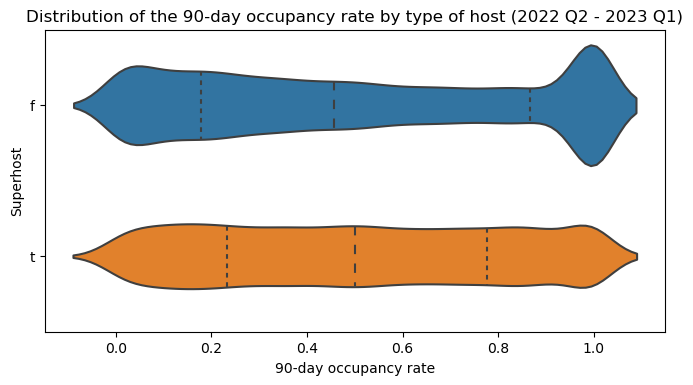

In [34]:
#Print the overall 90-day occupancy rate distribution
plt.figure(figsize=(8,4),dpi=100)

sns.violinplot(data=full_data_df, x="occupancy_rate_90", y="host_is_superhost",inner="quartiles")

plt.title('Distribution of the 90-day occupancy rate by type of host (2022 Q2 - 2023 Q1)')
plt.xlabel('90-day occupancy rate')
plt.ylabel('Superhost');

__Observation__: By looking at the distribution of the overall 90-day occupancy rate it is possible to see that listings from superhosts in general have a higher occupancy rate and that the distribution is very uniform across all amounts of the occupancy rate. The number of listings from non-superhosts overall tends to decrease as the rate increases but there is an interesting peak at 100%, which means that there is a considerable amount of listings non-superhosts that are always __sold-out__. 

In [35]:
#Print the mean occupancy rate by city for the 12-month period
full_data_df.groupby("neighbourhood_group_cleansed")["occupancy_rate_90"].mean().sort_values(ascending=False)

neighbourhood_group_cleansed
MATOSINHOS              0.552419
VILA NOVA DE GAIA       0.522174
MAIA                    0.514977
PORTO                   0.514593
SÃO JOÃO DA MADEIRA     0.499638
VALONGO                 0.492169
PÓVOA DE VARZIM         0.471551
ESPINHO                 0.462237
VILA DO CONDE           0.443469
GONDOMAR                0.433726
PAREDES                 0.408646
SANTA MARIA DA FEIRA    0.385779
SANTO TIRSO             0.366355
TROFA                   0.327951
OLIVEIRA DE AZEMÉIS     0.313078
VALE DE CAMBRA          0.303248
AROUCA                  0.264172
Name: occupancy_rate_90, dtype: float64

Print the 90-day occupancy rates by batch date and by city

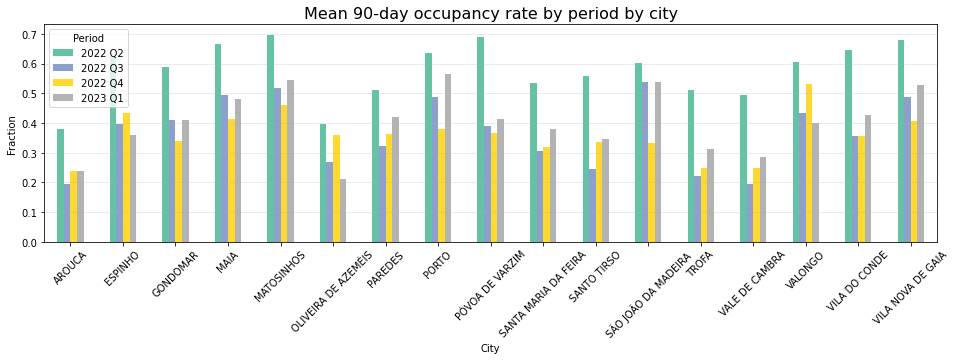

In [36]:
# get the mean value of the occupancy rates by period by city
occ_rates_by_batch_by_city = full_data_df.groupby(["period","neighbourhood_group_cleansed"])["occupancy_rate_90"].mean().unstack()
occ_rates_by_batch_by_city = occ_rates_by_batch_by_city.T

# Plot the bar chat
ax = occ_rates_by_batch_by_city.plot.bar(figsize=(16,4), legend=True, cmap='Set2')

ax.set_title("Mean 90-day occupancy rate by period by city", fontsize=16)
ax.set_xlabel("City")
ax.set_ylabel("Fraction")
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.5)
plt.xticks(rotation=45)

plt.legend(title="Period")

plt.show()

Print the 90-day occupancy rates by number of reviews over a 12-mothn period

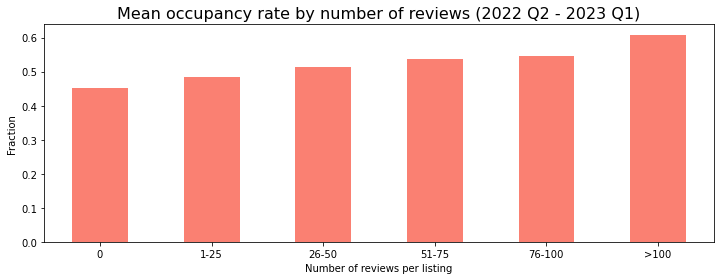

In [37]:
# get the mean value of the occupancy rates by number of reviews
occ_rate_by_reviews = full_data_df.groupby("number_of_reviews")["occupancy_rate_90"].mean()

# transform the nummeric value of number of reviews into categories 
occ_rate_by_reviews = occ_rate_by_reviews.sort_index()
occ_rate_by_reviews = occ_rate_by_reviews.reset_index()

bins = [0, 25, 50, 75, 100, 1000]
labels = ['1-25', '26-50', '51-75', '76-100', '>100']

occ_rate_by_reviews['number_of_reviews'] = pd.cut(occ_rate_by_reviews['number_of_reviews'], bins=bins, labels=labels)
occ_rate_by_reviews['number_of_reviews'] = occ_rate_by_reviews['number_of_reviews'].astype(str).fillna("0")

# get the mean value of the occupancy rates by number of reviews
occ_rate_by_reviews = occ_rate_by_reviews.groupby("number_of_reviews")["occupancy_rate_90"].mean().sort_index()

# Plot the bar chat
ax = occ_rate_by_reviews.plot.bar(figsize=(12,4),color="salmon",legend=False)
        
ax.set_title("Mean occupancy rate by number of reviews (2022 Q2 - 2023 Q1)", fontsize=16)
ax.set_xlabel("Number of reviews per listing")
ax.set_ylabel("Fraction")
plt.xticks(rotation=0)

plt.show();

#### <a href="#top">Back to top</a>

<a id='section3_2_3'></a>
### Analysis of the Prices

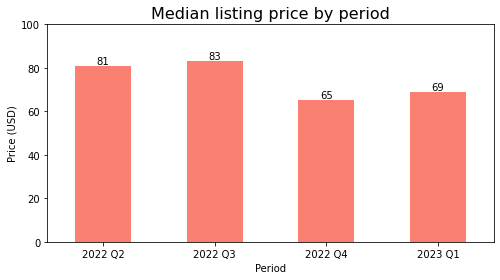

The overall median of the 90-day unit price between June 2022 and Mars 2023 was $75.0.


In [38]:
### get the mean value of the occupancy rates by batch date
prices_by_batch = full_data_df.groupby("period")["price_usd"].median()

# Plot the bar chat
ax = prices_by_batch.plot.bar(figsize=(8,4),color="salmon",legend=False)

for i, value in enumerate(prices_by_batch):
    ax.annotate(f"""{value:.0f}""", (i, value), ha='center', va='bottom')
        
ax.set_title("Median listing price by period", fontsize=16)
ax.set_xlabel("Period")
ax.set_ylabel("Price (USD)")

plt.ylim(0, 100)
plt.xticks(rotation=0)

plt.show();
print("The overall median of the 90-day unit price between June 2022 and Mars 2023 was ${}.".format(full_data_df["price_usd"].median()))

__Observations__: 
- The prices seem vary between the time of the year but without more historical data is impossible to determine if there is a trend here. 
- Price can also be related with other factors like location, number of bedrooms or if it is a superhost

In [39]:
#Print the media unit price rate by caty for the 12-month period
full_data_df.groupby("neighbourhood_group_cleansed")["price_usd"].median().sort_values(ascending=False)

neighbourhood_group_cleansed
TROFA                   120.0
VALE DE CAMBRA          110.5
GONDOMAR                100.0
AROUCA                   99.0
SANTO TIRSO              92.5
PAREDES                  92.0
VILA DO CONDE            80.0
PÓVOA DE VARZIM          80.0
ESPINHO                  75.0
PORTO                    74.0
SANTA MARIA DA FEIRA     70.0
VILA NOVA DE GAIA        70.0
VALONGO                  69.0
MATOSINHOS               68.0
MAIA                     65.0
OLIVEIRA DE AZEMÉIS      60.0
SÃO JOÃO DA MADEIRA      49.0
Name: price_usd, dtype: float64

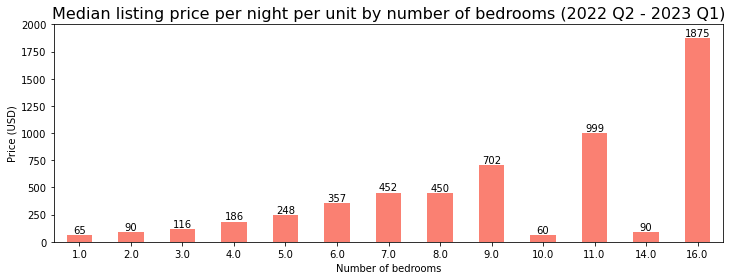

In [40]:
### get the mean value of the occupancy rates by batch date
prices_by_bedrooms = full_data_df.groupby("bedrooms")["price_usd"].median()

# Plot the bar chat
ax = prices_by_bedrooms.plot.bar(figsize=(12,4),color="salmon",legend=False)

for i, value in enumerate(prices_by_bedrooms):
    ax.annotate(f"""{value:.0f}""", (i, value), ha='center', va='bottom')
        
ax.set_title("Median listing price per night per unit by number of bedrooms (2022 Q2 - 2023 Q1)", fontsize=16)
ax.set_xlabel("Number of bedrooms")
ax.set_ylabel("Price (USD)")
plt.ylim(0, 2000)
plt.xticks(rotation=0)

plt.show();

__Observation:__ As expected the median value unit price tends to increase with the number of bedrooms. There are two values that do not follow this trend but this can this can just be highly influence due to the small amout of listings for these categories. Example: 

In [41]:
# Print number of units with 10 bedrooms by batch date
full_data_df[full_data_df["bedrooms"] == 10].groupby(["bedrooms", "calendar_last_scraped"]).size()

bedrooms  calendar_last_scraped
10.0      2022-06-01               5
          2022-09-01               5
          2022-12-01               4
          2023-03-01               4
dtype: int64

In [42]:
#Print the media unit price rate by city for the 12-month period
full_data_df.groupby("host_is_superhost")["price_usd"].median()

host_is_superhost
f    71.0
t    79.0
Name: price_usd, dtype: float64

__Observation__: Superhosts seem to have a slighty bigger median price per unit.

#### <a href="#top">Back to top</a>

<a id='section4'></a>
# 4. Modeling

In this section I tried to create a machine learning model that is able to predict the price unit based on the listings dataset available for the Q1 2023. I did not find relevant to include the overall data since I am not using any historical data for this prediction.

It should be mentioned that this model can only predict based on the features available in the dataset and there could be more aspects which may be important and are not captured here, like mentioned in the introduction of this project. 
With this in mind, these will be the features used for __training__:
- neighbourhood_cleansed
- host_is_superhost
- property_type
- room_type
- accommodates
- bathrooms_text
- bedrooms
- beds
- amenities

The __target__ variable will be:
- price_usd

Features left out:
- Features like the __90-day occupancy rate__ or __number or reviews__ were purposely left out because a new listing will always have these values at 0 so it does not make sense to compare it with other listings, although one could argue that this could be used as a pricing strategy. However this goes beyond the scope. 

- Another features that were left out were __latitude__ and __longitude__. Although it is true that geospacial that can be very important in this scenario, we already have the feature neighbourhood_cleansed which includes 150 unique values and should be enough fine for this approach. A problem with geospacial data could be that if some particular are is missing in our dataset we are not sure how this will impact the performance. A way to mitigate this problem could be to use a fixed point in the map an calculate distances, but in this problem we are looking into different regions and there is not just one point of interest, like a specific landmark. Knowing the region well, I know that there are beaches, city center, river views and other landmarks which may dictate the attractiveness of the listing and therefore affect the price. 

#### <a href="#top">Back to top</a>

<a id='section4_1'></a>
## 4.1 Feature Engineering

In this section I transformed the text categorical features into numeric features so they can fed into an algorithm and also created new features based of the columns bathroom_text and ammenities.

In [43]:
# read in the Q1 2023 dataset
target_df = listings_df_ls[0].copy()

<a id='section4_1_1'></a>
### Feature: neighbourhood_cleansed

In [44]:
# Use dummy encoding to transform the categorical column into binary columns for each unique value
target_df = target_df.join(pd.get_dummies(target_df["neighbourhood_cleansed"]))
print(target_df.columns)

Index(['id', 'host_id', 'host_is_superhost', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates',
       ...
       'Vila Nova do Campo', 'Vila de Cucujães', 'Vila do Conde',
       'Vilar de Andorinho', 'Vilar de Pinheiro', 'Vilar e Mosteiró', 'Várzea',
       'Água Longa', 'Águas Santas', 'Árvore'],
      dtype='object', length=173)


#### <a href="#top">Back to top</a>

<a id='section4_1_2'></a>
### Feature: host_is_superhost

In [45]:
#transform the value in host_is_superhost for better readability
target_df["host_is_superhost"] = target_df["host_is_superhost"].map({"f": "superhost_false", "t":"superhost_true"})

In [46]:
# Use dummy encoding to transform the categorical column into binary columns for each unique value
target_df = target_df.join(pd.get_dummies(target_df["host_is_superhost"]))
print(target_df.columns)

Index(['id', 'host_id', 'host_is_superhost', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates',
       ...
       'Vila do Conde', 'Vilar de Andorinho', 'Vilar de Pinheiro',
       'Vilar e Mosteiró', 'Várzea', 'Água Longa', 'Águas Santas', 'Árvore',
       'superhost_false', 'superhost_true'],
      dtype='object', length=175)


#### <a href="#top">Back to top</a>

<a id='section4_1_3'></a>
### Feature: property_type

In [47]:
# Use dummy encoding to transform the categorical column into binary columns for each unique value
target_df = target_df.join(pd.get_dummies(target_df["property_type"]))
print(target_df.columns)

Index(['id', 'host_id', 'host_is_superhost', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates',
       ...
       'Shared room in guest suite', 'Shared room in guesthouse',
       'Shared room in home', 'Shared room in hostel',
       'Shared room in rental unit', 'Shipping container', 'Tiny home', 'Tipi',
       'Treehouse', 'Windmill'],
      dtype='object', length=246)


#### <a href="#top">Back to top</a>

### Feature: room_type

In [48]:
#transform the value in room_type to avoid overlap
target_df["room_type"] = target_df["room_type"].map({"Shared room": "Shared room type",
                                                     "Private room":"Private room type",
                                                     "Entire home/apt":"Entire home/apt type",
                                                     "Hotel room":"Hotel room type"})

In [49]:
# Use dummy encoding to transform the categorical column into binary columns for each unique value
target_df = target_df.join(pd.get_dummies(target_df["room_type"]))
print(target_df.columns)

Index(['id', 'host_id', 'host_is_superhost', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates',
       ...
       'Shared room in rental unit', 'Shipping container', 'Tiny home', 'Tipi',
       'Treehouse', 'Windmill', 'Entire home/apt type', 'Hotel room type',
       'Private room type', 'Shared room type'],
      dtype='object', length=250)


#### <a href="#top">Back to top</a>

<a id='section4_1_4'></a>
### Feature: bathrooms_text
From the bathroom text I created two new columns using Regex pattern matching: _bathrooms_ and _bathroom_shared_.

In [50]:
target_df["bathrooms_text"].unique()

array(['1.5 shared baths', '2 shared baths', '1 private bath',
       '3 shared baths', '1 bath', '2 baths', '1 shared bath', '5 baths',
       '3 baths', '6 baths', '1.5 baths', '7 baths', '4 baths',
       '3.5 baths', '0 baths', '5.5 baths', '2.5 baths', '8 baths',
       '11 baths', '9 baths', '3.5 shared baths', '4.5 baths', nan,
       '0 shared baths', '2.5 shared baths', 'Shared half-bath',
       '6.5 baths', 'Half-bath', '4 shared baths', '8.5 baths',
       '7.5 shared baths', '5 shared baths', '6 shared baths',
       '4.5 shared baths', '7.5 baths', '10 baths', 'Private half-bath',
       '16 baths', '10.5 baths'], dtype=object)

There are some _missing values_ that need to be treated first. Here I used the information available in _room_type_ and _bedrooms_ and added the mode found for the same categories in the dataset.

In [51]:
# get the mode of bathrooms_text for the specific categories room_type and bedrooms and fill in the missing values
mode_per_group = target_df.groupby(["room_type","bedrooms"])["bathrooms_text"].transform(lambda x: x.mode()[0])
target_df["bathrooms_text"] = target_df["bathrooms_text"].fillna(mode_per_group)

print("Number of missing data in bathrooms_text: {}".format(len(target_df[target_df["bathrooms_text"].isna()])))

Number of missing data in bathrooms_text: 0


In [52]:
# Extract the number of bathrooms (if no number is found then set 0.5)
target_df["bathrooms"] = target_df["bathrooms_text"].str.extract(r'(\d?.?\d)').fillna(0.5).astype(float)

In [53]:
# Extract the information if baths are shared (if the text "hared" is not found then set 0)
target_df["bathrooms_shared"] = np.where(target_df['bathrooms_text'].str.contains('hared', regex=False), 1, 0)

In [54]:
target_df[["bathrooms_text","bathrooms","bathrooms_shared"]].head(10)

,bathrooms_text,bathrooms,bathrooms_shared
0,1.5 shared baths,1.5,1
1,1.5 shared baths,1.5,1
2,1.5 shared baths,1.5,1
3,2 shared baths,2.0,1
4,2 shared baths,2.0,1
5,1.5 shared baths,1.5,1
6,2 shared baths,2.0,1
7,1 private bath,1.0,0
8,3 shared baths,3.0,1
9,1 bath,1.0,0


#### <a href="#top">Back to top</a>

<a id='section4_1_5'></a>
### Feature: amenities
This feature contains a list of strings and therefore needs to be converted into dummy variables. Please read through this section, to see which approach I have chosen in order to select a subset of the amenities.

In [55]:
# Transform the amenities column into dummy variables of 1 and 0

# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the amenities column
dummy_df = pd.DataFrame(mlb.fit_transform(target_df['amenities'].apply(lambda x: list(x.split(",")))), columns=mlb.classes_)

In [56]:
print(f"""Number of distinct amenities: {len(mlb.classes_)}""")

Number of distinct amenities: 2173


__Observation__: in order to create dummy variables from the amenities I used the multi-label binarizer algorithm from scikit-learn to achieve it. However, I quickly noticed that the number of columns would be __too high__ to be used for training, as it would make the problem __too complex__, so I looked into the distribution of the frequency of the amenities to see if I could reduce the number of amenities. 

In [57]:
# get the frequency per amenity
amenities_count = pd.DataFrame(target_df['amenities'])['amenities'].apply(lambda x: x.split(",")).explode('amenities').value_counts()

In [58]:
# print the top 10 most frequent amenities in relation to the total number of Airbnb units
(amenities_count/len(target_df)).head(10)

 "Kitchen"                  0.903062
 "Hair dryer"               0.862127
 "Fire extinguisher"        0.807413
 "Hangers"                  0.800645
 "First aid kit"            0.790330
 "Wifi"                     0.788880
 "Essentials"               0.752377
 "Dishes and silverware"    0.747542
 "Iron"                     0.717969
 "Cooking basics"           0.689122
Name: amenities, dtype: float64

In [59]:
# print the top 10 less frequent amenities in relation to the total number of Airbnb units
(amenities_count/len(target_df)).tail(10)

["30\" TV with Chromecast                                             0.000081
 "BOSH stainless steel induction stove"                               0.000081
 "Samsung  refrigerator"                                              0.000081
 "Pequeno com 1 espa\u00e7o de congela\u00e7\u00e3o  refrigerator"    0.000081
 "Fast wifi \u2013 347 Mbps"                                          0.000081
 "Ikea stove"                                                         0.000081
 "Arch brito body soap"                                               0.000081
 "Fast wifi \u2013 105 Mbps"                                          0.000081
["Fast wifi \u2013 213 Mbps"                                          0.000081
 "Fast wifi \u2013 220 Mbps"                                          0.000081
Name: amenities, dtype: float64

In [60]:
# print out the summary statistics and the distribution of the frequency of amenities
amenities_count.describe(percentiles=[0,0.25,0.05,0.75,0.8,0.85,0.9,0.95,0.99])

count     2173.000000
mean       171.509894
std        924.940504
min          1.000000
0%           1.000000
5%           1.000000
25%          1.000000
50%          2.000000
75%          7.000000
80%         14.000000
85%         28.000000
90%         76.000000
95%        535.800000
99%       4844.840000
max      11207.000000
Name: amenities, dtype: float64

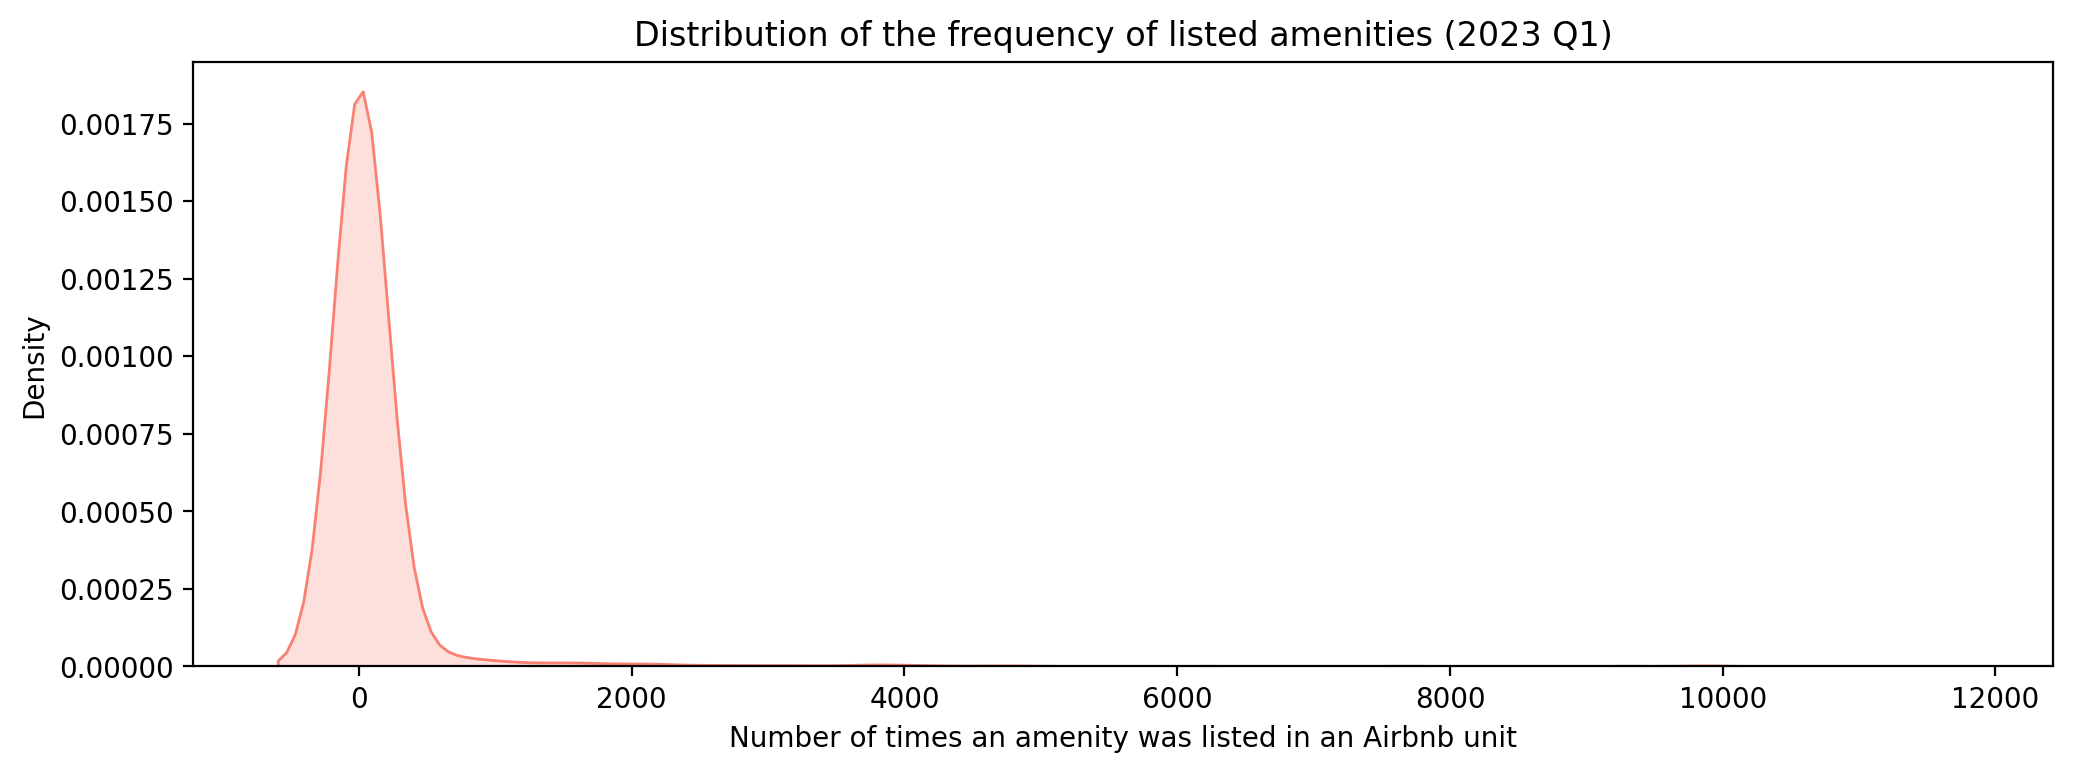

In [61]:
#Print the distribution of the frequency of amenities
plt.figure(figsize=(12,4),dpi=200)
plt.xlabel('Number of times an amenity was listed in an Airbnb unit')
plt.title('Distribution of the frequency of listed amenities (2023 Q1)')

sns.kdeplot(x=amenities_count,color="salmon", shade=True);

__Observation__: By looking at the distribution of the data and the rate of appearence of the top amenities it is possible to identify some challenges:
- I wanted to find a list of interesting amenities, so I wanted to discard the most common ones as they probably will not have any predictive power. 
- I also did not want to use very uncommon amenities as they can potentially bias the prediction.


With this in mind and looking at the distribution I could not find a statistic feasible approach on how to create a range of interesting frequencies just based on the summary statistics. Therefore, I decided to calculate the __pearson correlation__ each amenity has in relation to the price and based on that hopefully make a decision.

In [62]:
# add the price column to the amenities dataframe resulted from the MultiLabelBinarizer
dummy_df["price_usd"] = target_df["price_usd"]
dummy_df.head(3)

,""" 2 glass-ceramic hobs/plates induction stove""",""" built-in refrigerator with small freezer compartment refrigerator""","""- refrigerator""",""". body soap""",""". oven""",""". shampoo""",""". stove""","""100\"" HDTV with premium cable","""100\"" HDTV with standard cable""]","""107\"" HDTV with Chromecast","""10\"" HDTV with Netflix","""110\"" TV with standard cable","""13\"" TV with standard cable""","""14\"" TV""","""15\"" HDTV with Netflix""","""16\"" HDTV with standard cable""","""17\"" HDTV with standard cable""","""18\"" TV with standard cable""","""200\"" HDTV with standard cable""","""20\"" HDTV with Netflix""","""20\"" HDTV with standard cable","""20\"" TV with Netflix","""20\"" TV with standard cable""","""21\"" HDTV with premium cable""","""21\"" HDTV with standard cable""","""21\"" HDTV""","""22\"" HDTV with premium cable""","""22\"" HDTV with standard cable""","""22\"" HDTV with standard cable""]","""22\"" HDTV""","""22\"" TV with standard cable""","""22\"" TV""","""23\"" TV with standard cable""","""24\"" HDTV with Chromecast""","""24\"" HDTV with Netflix","""24\"" HDTV with premium cable""","""24\"" HDTV with standard cable""","""24\"" TV with Netflix","""24\"" TV with premium cable","""24\"" TV with standard cable""","""25\"" HDTV with Netflix","""25\"" HDTV with standard cable""","""25\"" TV with standard cable""","""26\"" HDTV with Amazon Prime Video","""26\"" HDTV with HBO Max","""26\"" HDTV with premium cable","""26\"" HDTV with premium cable""","""26\"" HDTV with standard cable""","""26\"" TV with standard cable""","""27\"" HDTV with Netflix",...,"[""Patio or balcony""","[""Pets allowed""","[""Pingo doce e outros body soap""","[""Portable air conditioning""","[""Portuguese brand shampoo""","[""Pr\u00f3pria conditioner""","[""Priscos shampoo""","[""Private entrance""","[""Private pool - infinity""","[""Refrigerator""","[""Rice maker""","[""Room-darkening shades""","[""Security cameras on property""","[""Self check-in""","[""Sensitive body soap""","[""Shampoo""","[""Shared backyard""","[""Shared gym in building""","[""Shared hot tub - available all year""","[""Shared outdoor pool - available all year","[""Shared outdoor pool - available seasonally","[""Shared pool""","[""Shower gel""","[""Smoke alarm""","[""Smoking allowed""","[""Sound system with Bluetooth and aux""","[""Stainless steel double oven""","[""Standalone high chair - available upon request""","[""TV with Netflix""","[""TV with standard cable","[""TV with standard cable""","[""TV""","[""TV""]","[""Teka stove""","[""V\u00e1rias refrigerator""","[""Valley view""","[""Variada body soap""","[""Vineyard view""","[""Washer""","[""Waterfront""","[""Wifi \u2013 11 Mbps""","[""Wifi \u2013 35 Mbps""","[""Wifi""","[""Wifi""]","[""Wine glasses""","[""Zanussi stainless steel electric stove""","[""\""small oven\"" oven""","[""\u00a0Midea conditioner""",[],price_usd
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12.0


In [63]:
#calculate the correlation between each amenity and the price
amenity_corr = dummy_df.corr()['price_usd']

#remove the price from the correlation analysis as it is 1
amenity_corr = amenity_corr.reset_index()
amenity_corr = amenity_corr[amenity_corr["index"] != "price_usd"]

amenity_corr.head()

,index,price_usd
0,""" 2 glass-ceramic hobs/plates induction stove""",-0.000436
1,""" built-in refrigerator with small freezer compartment refrigerator""",-0.000436
2,"""- refrigerator""",-0.000031
3,""". body soap""",-0.000501
4,""". oven""",-0.000478


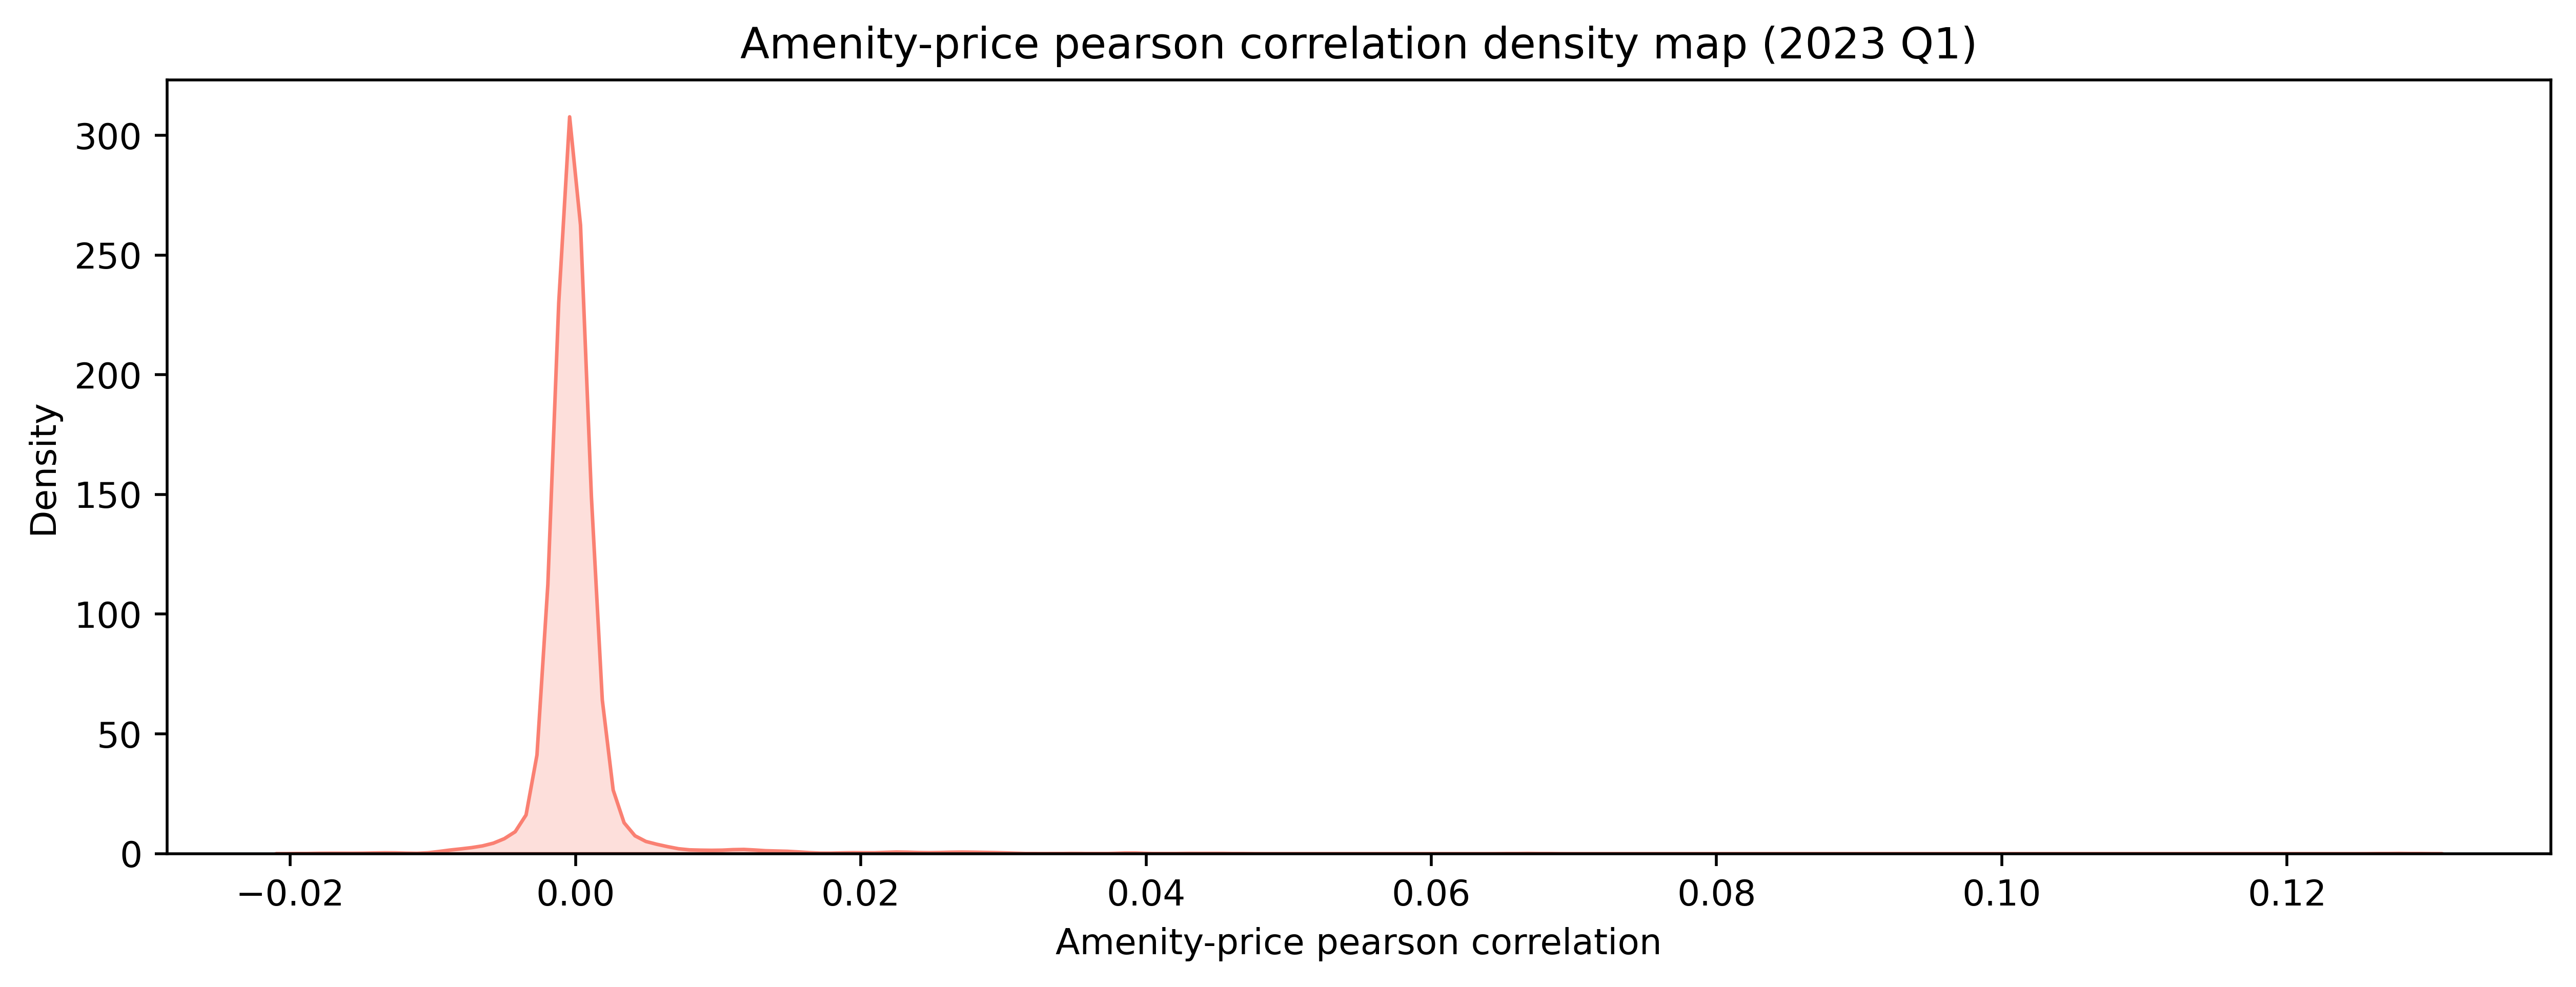

In [64]:
#Print the amenity-price pearson correlation density map
plt.figure(figsize=(12,4),dpi=500)
plt.xlabel('Amenity-price pearson correlation')
plt.title('Amenity-price pearson correlation density map (2023 Q1)')

sns.kdeplot(x=amenity_corr["price_usd"],color="salmon", shade=True);

In [65]:
# print out the summary statistics and the distribution of the amenity-price pearson correlation
amenity_corr["price_usd"].describe([0,0.25,0.05,0.75,0.8,0.85,0.9,0.95,0.99])

count    2173.000000
mean        0.000188
std         0.004699
min        -0.018010
0%         -0.018010
5%         -0.001988
25%        -0.000581
50%        -0.000339
75%         0.000039
80%         0.000196
85%         0.000540
90%         0.001010
95%         0.002665
99%         0.018815
max         0.127859
Name: price_usd, dtype: float64

In [66]:
print(f"""Min correlation: {amenity_corr["price_usd"].min()}""")
print(f"""Max correlation: {amenity_corr["price_usd"].max()}""")

Min correlation: -0.018009799036248924
Max correlation: 0.1278593144124035


__Observation__: 
 - Looking at the distribution of the correlations we can see that the data has a high kurtosis with a high peak centered around 0. This means that the great majority of the amenities may not have any correlation at all with the price. 
 - Looking at the min and max values of the correlations we can see that the highest correlated amenties (negatively and positively) also do not seem to have a high correlation with the price - since the values are not close to -1 or 1.
 
Based on this, I still decided to use some of the amenities which have at least some minimal correlation (negatively and positively), so I could include some information from the original _amenities_ column into training the model as they can have some __synergy__ with other features. For this I set the boundaries <= -0.01 and >= 0.01, in order to capture the highest correlated amenities and ignore the non-correlated ones.

In [67]:
# Filter the list of amenities based on the correlation boundaries: <=-0.01 and >=0.01
amenity_corr_filtered = amenity_corr[(amenity_corr["price_usd"] >= 0.01) | (amenity_corr["price_usd"] <= -0.01)]

print(f"""Total number of amenities: {len(amenity_corr_filtered)}""")

Total number of amenities: 47


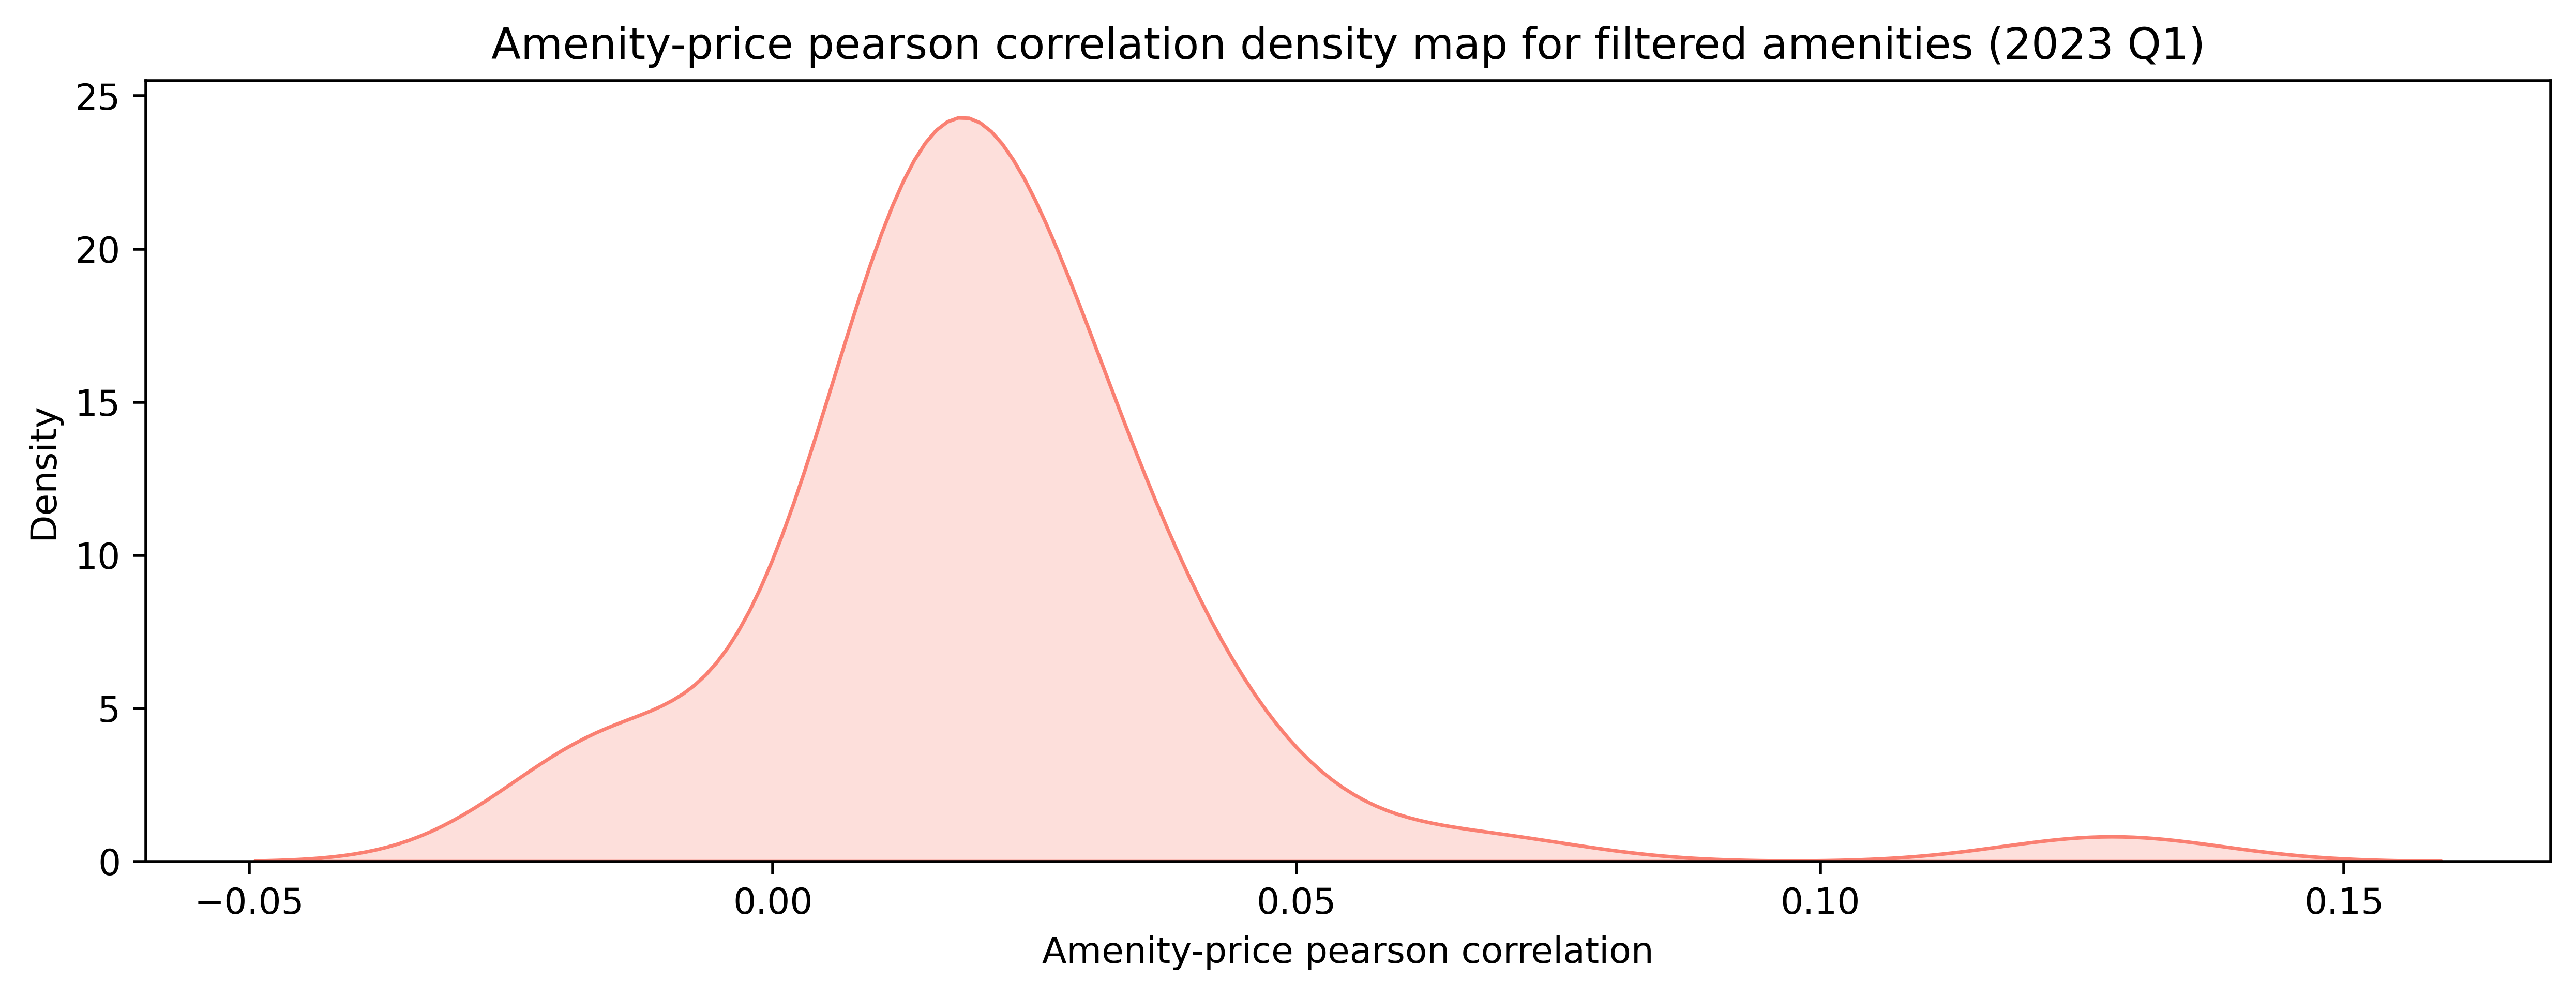

In [68]:
#Print the amenity-price pearson correlation density map for filtered amenities
plt.figure(figsize=(12,4),dpi=500)
plt.xlabel('Amenity-price pearson correlation')
plt.title('Amenity-price pearson correlation density map for filtered amenities (2023 Q1)')

sns.kdeplot(x=amenity_corr_filtered["price_usd"],color="salmon", shade=True);

__Observation:__ In this case I used 47 of the 2174 amenties to create a list of "interesting" amenities and created a dummy column with 1 or 0 for each amenity.

In [69]:
# create a list with the interesting amenities
amenity_ls = amenity_corr_filtered["index"].apply(lambda x: x.replace('\"',"").replace('[',"").replace(']',"").strip()).tolist()
print(amenity_ls)

['Air conditioning', 'BOSCH oven', 'BOSCH refrigerator', 'Bathtub', 'Bidet', 'Bosch electric stove', 'Clothing storage: dresser and walk-in closet', 'Dishwasher', 'Dryer \\u2013\\u00a0In unit', 'Dryer', 'Essentials', 'Free parking on premises', 'Free street parking', 'Gym', 'Hair dryer', 'Heating', 'Host greets you', 'Hot water', 'Hot water', 'Indoor fireplace', 'JBL sound system', 'Laundromat nearby', 'Lock on bedroom door', 'Lockbox', 'Oven', 'Pets allowed', 'Pool table', 'Pool', 'Private backyard \\u2013 Fully fenced', 'Private gym in building', 'Private patio or balcony', 'Private pool', 'Rituals body soap', 'Rituals conditioner', 'Rituals shampoo', 'River view', 'Self check-in', 'Ski-in/Ski-out', 'Smoking allowed', 'TV with standard cable', 'V\\u00e1rias  body soap', 'V\\u00e1rios  conditioner', 'Washer', 'Waterfront', 'Wifi \\u2013 20 Mbps', 'Bed linens', 'Cleaning products']


In [70]:
#define a function that counts the number of hits in the amenities column
def create_amenity_cols(row):
    """
    This function is meant to be applied into a pandas Dataframe column only.
    For each row of the specified column it checks if the element in the amenity list is contained in the "amenities" column.
    If yes it gets 1 otherwise 0.
    """
    return [1 if elem in row else 0 for elem in amenity_ls]

In [71]:
# apply the function on the "amenities" column
amenity_cols_df = target_df["amenities"].apply(lambda x: create_amenity_cols(x))
amenity_cols_df.head()

0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Name: amenities, dtype: object

In [72]:
# create the dummy columns based on the results and append them to the target dataframe
target_df = pd.concat([target_df, pd.DataFrame(amenity_cols_df.tolist(), columns=amenity_ls)], axis=1)
target_df.iloc[:,-48:].tail()

,bathrooms_shared,Air conditioning,BOSCH oven,BOSCH refrigerator,Bathtub,Bidet,Bosch electric stove,Clothing storage: dresser and walk-in closet,Dishwasher,Dryer \u2013\u00a0In unit,Dryer,Essentials,Free parking on premises,Free street parking,Gym,Hair dryer,Heating,Host greets you,Hot water,Hot water,Indoor fireplace,JBL sound system,Laundromat nearby,Lock on bedroom door,Lockbox,Oven,Pets allowed,Pool table,Pool,Private backyard \u2013 Fully fenced,Private gym in building,Private patio or balcony,Private pool,Rituals body soap,Rituals conditioner,Rituals shampoo,River view,Self check-in,Ski-in/Ski-out,Smoking allowed,TV with standard cable,V\u00e1rias body soap,V\u00e1rios conditioner,Washer,Waterfront,Wifi \u2013 20 Mbps,Bed linens,Cleaning products
12405,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
12406,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
12407,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
12408,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1
12409,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [73]:
#print all columns in the dataframe
target_df.columns

Index(['id', 'host_id', 'host_is_superhost', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates',
       ...
       'Ski-in/Ski-out', 'Smoking allowed', 'TV with standard cable',
       'V\u00e1rias  body soap', 'V\u00e1rios  conditioner', 'Washer',
       'Waterfront', 'Wifi \u2013 20 Mbps', 'Bed linens', 'Cleaning products'],
      dtype='object', length=299)

In [74]:
# remove all unnecessary columns from target_df
drop_columns = list(listings_df_ls[0].columns)
relevant_colums = ["price_usd","accommodates","bedrooms","beds"]

for col in relevant_colums:
    drop_columns.remove(col)
    
target_df = target_df.drop(columns=drop_columns)

In [75]:
print(list(target_df.columns))

['accommodates', 'bedrooms', 'beds', 'price_usd', 'AVer-o-Mar, Amorim e Terroso', 'Agrela', 'Aguiar de Sousa', 'Aguçadoura e Navais', 'Aldoar, Foz do Douro e Nevogilde', 'Alfena', 'Alvarelhos e Guidões', 'Alvarenga', 'Anta e Guetim', 'Arcozelo', 'Areias, Sequeiró, Lama e Palmeira', 'Argoncilhe', 'Arouca e Burgo', 'Arões', 'Avintes', 'Azurara', 'Baguim do Monte (Rio Tinto)', 'Bagunte, Ferreiró, Outeiro Maior e Parada', 'Balazar', 'Baltar', 'Bonfim', 'Bougado (São Martinho e Santiago)', 'Cabreiros e Albergaria da Serra', 'Caldas de São Jorge e de Pigeiros', 'Campanhã', 'Campo e Sobrado', 'Canedo, Vale e Vila Maior', 'Canelas', 'Canelas e Espiunca', 'Canidelo', 'Carregosa', 'Carreira e Refojos de Riba de Ave', 'Castêlo da Maia', 'Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória', 'Cepelos', 'Cesar', 'Cete', 'Chave', 'Cidade da Maia', 'Coronado (São Romão e São Mamede)', 'Covelas', 'Cristelo', 'Custóias, Leça do Balio e Guifões', 'Duas Igrejas', 'Ermesinde', 'Escariz', 'Espinho', 'Este

#### <a href="#top">Back to top</a>

<a id='section4_1_6'></a>
### Target: price
This is not per se a step of feature engineering but a very important one nonetheless. Above, in the section of <a href="#section3_1">Data Distribution</a>, it is possible to see how extremely skewed the distribution of price is. If this is not treated it can have a negative impact on the performance.

In this case I decided to remove the extremely expensive listings from the list for various reasons:
1. No matter how I transform the data, for example by using the log price instead, this will always influence the results because some outliers are too extreme.
2. Although this may be important information we might not be able to explain these extreme prizes just with the data at hand. For example an important factor missing would be the size of the listing.
3. The goal is to predict a listing that is somehow realistic in a normal context. I think that after a certain threshold of luxus you are free to dictate the price and don't need to reference on the average.

With this in mind I simply decided to cut off everything that is above 500 USD and discard it. 

In [77]:
droped_listings = target_df[target_df["price_usd"] > 500]

print("Number of discarded listings:{}".format(len(droped_listings)))
print("Percentage of discarded listings:{}%".format(round(len(droped_listings)/len(target_df)*100, 2)))

Number of discarded listings:87
Percentage of discarded listings:0.7%


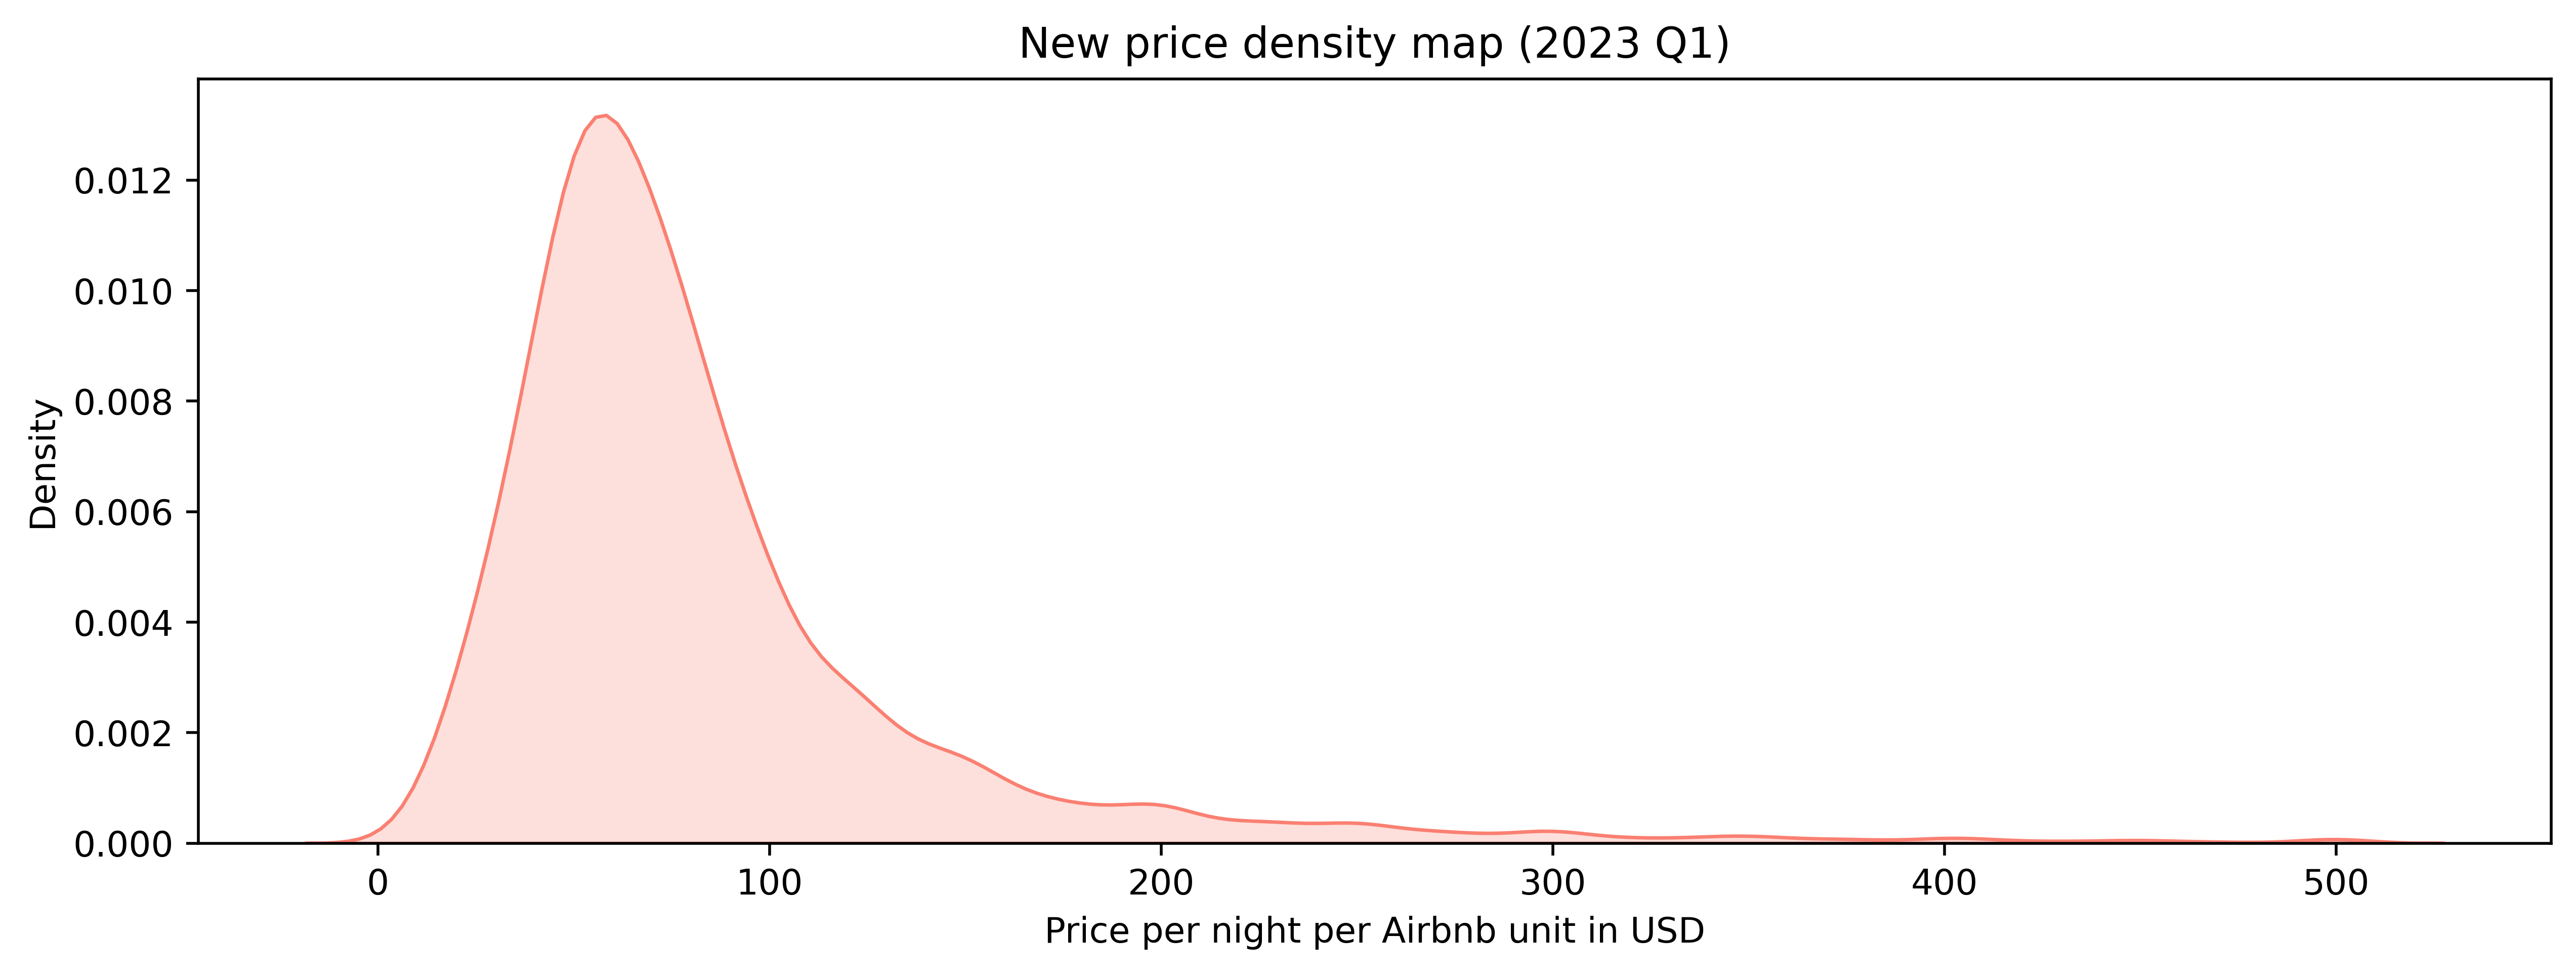

In [78]:
#Remove all listings about 500 USD
target_df = target_df[target_df["price_usd"] <= 500]

#Print the price distribution
plt.figure(figsize=(12,4),dpi=500)
plt.xlabel('Price per night per Airbnb unit in USD')
plt.title('New price density map (2023 Q1)')

sns.kdeplot(x=target_df["price_usd"],color="salmon", shade=True);

In [93]:
# print out the summary statistics and the distribution of the frequency of amenities
target_df["price_usd"].describe()

count    12323.000000
mean        84.169520
std         60.424838
min          9.000000
25%         50.000000
50%         69.000000
75%         96.000000
max        500.000000
Name: price_usd, dtype: float64

__Observation:__ Looking at the distribution it is still possible to see a light skeweness but it is something I was willing to accept and could mitigate using cross validation.

#### <a href="#top">Back to top</a>

<a id='section4_2'></a>
## 4.2 Training
In this section I trained tree different algorithms with increasing complexity: 
1. Linear regression (using elastic net)
2. Random forest
3. Gradient Boosting

Further steps used for training:
 - train-validation-test split, to leave hold-out dataset for final performance reporting.
 - standard scaler to scaled the data.
 - use a parameter grid search to train with multiple parameter combinations

In [102]:
# create the train-test-eval splits
X = target_df.drop("price_usd", axis=1)
y = target_df["price_usd"]

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.2, random_state=10)
X_validation, X_holdout, y_validation, y_holdout = train_test_split(X_other, y_other, test_size=0.5, random_state=10)

print("Size of X_train: {}".format(len(X_train)))
print("Size of X_validation: {}".format(len(X_validation)))
print("Size of X_holdout: {}".format(len(X_holdout)))
print("----------------------")
print("Size of y_train: {}".format(len(y_train)))
print("Size of y_validation: {}".format(len(y_validation)))
print("Size of y_holdout: {}".format(len(y_holdout)))

Size of X_train: 9858
Size of X_eval: 1232
Size of X_test: 1233
----------------------
Size of y_train: 9858
Size of y_eval: 1232
Size of y_test: 1233


In [ ]:
#compare the distributions of the target variable on the splits
print("Summary statistics of y_train")
y_train.describe()

print("Summary statistics of y_other")
y_other.describe()

In [103]:
# Scale the features
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)
X_holdout = scaler.transform(X_holdout)

Model: Linear Regression
Best Parameters: {}
Number of best parameter combination: 0
Best Train Set RMSE: 2007685815192367.8
Best Test Set RMSE: 1066820174698.5858


Model: Random Forest
Best Parameters: {'model__max_depth': 20, 'model__n_estimators': 300, 'model__random_state': 42}
Number of best parameter combination: 14
Best Train Set RMSE: 42.63122452105574
Best Test Set RMSE: 45.80390930388762




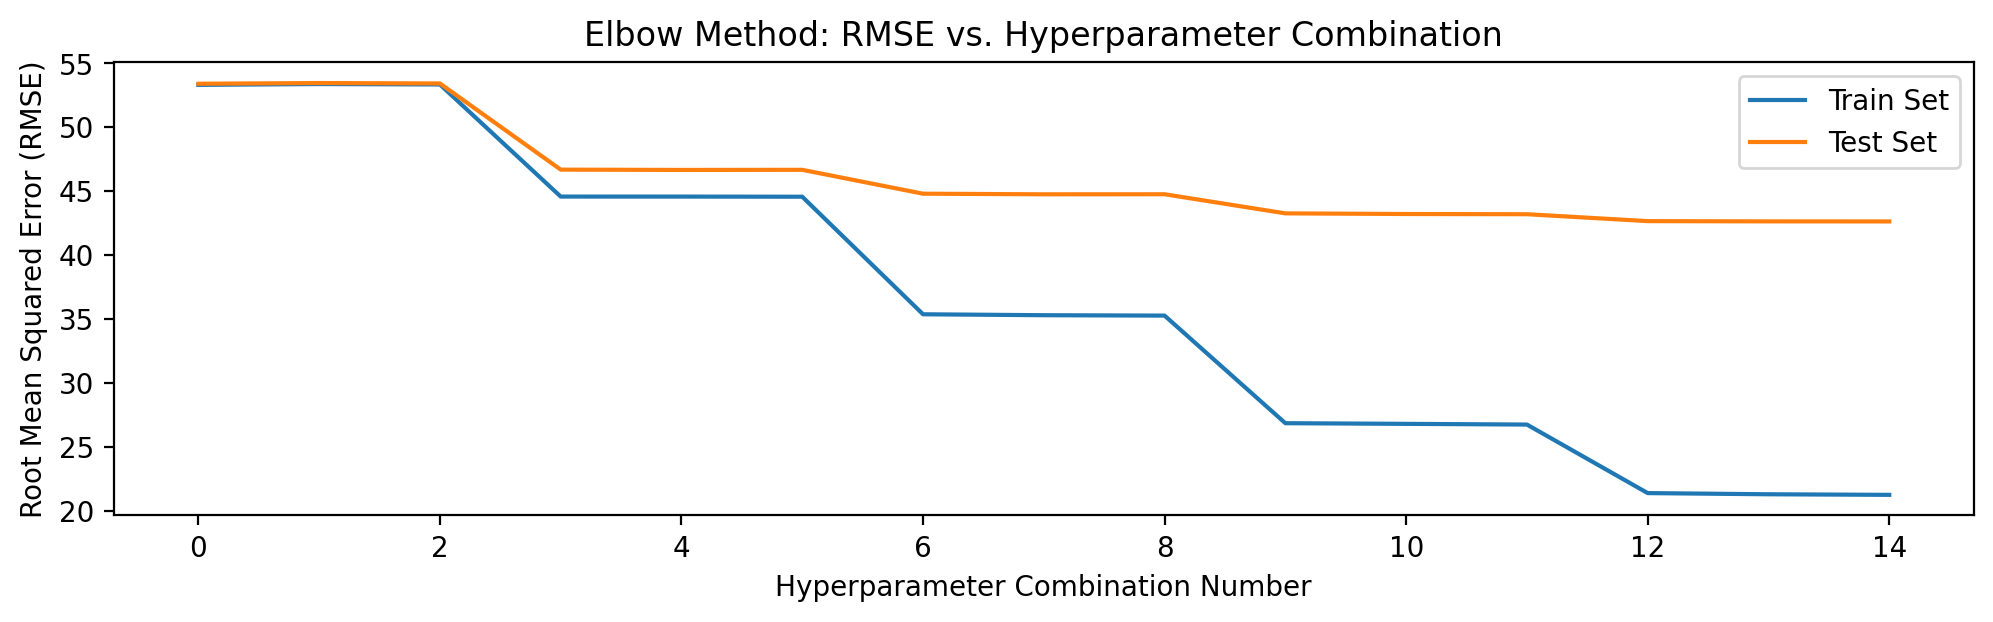

In [ ]:
#########################################################################
# BUILD A ML PIPELINE
#########################################################################
# Create a dictionary of ml models with their respective hyperparameters
models = {
    "Linear Regression": {
        "model": ElasticNet(),
        "param_grid": {
            'model__alpha': [0.1, 0.5, 1.0],  
            'model__l1_ratio': [0.1, 0.5, 0.9], 
            'model__fit_intercept': [True, False],
            'model__normalize': [True, False]

        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(),
        "param_grid": {
            "model__n_estimators": [100, 200, 300],
            "model__max_depth": [1, 5, 10, 15, 20],
            "model__random_state": [42]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(),
        "param_grid": {
            "model__n_estimators": [100, 200, 300],
            "model__learning_rate": [0.1, 0.05, 0.01],
            "model__max_depth": [3, 5, 7, 10]
        }
    }
}

# Iterate over the models and perform grid search with cross-validation
for model_name, model_config in models.items():
    # Define the pipeline with preprocessing and model
    pipeline = Pipeline(steps=[("model", model_config["model"])])

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(pipeline, 
                               param_grid=model_config["param_grid"], 
                               cv=5, 
                               scoring="neg_mean_squared_error", 
                               return_train_score=True)
    
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its evaluation metric score
    best_model = grid_search.best_estimator_
    best_score = np.sqrt(grid_search.best_score_ * -1) # Multiply by -1 to convert neg_mean_squared_error to MSE
    
    # Predict on the test set and evaluate the performance
    y_pred = best_model.predict(X_validation)
    
    # Evaluate the performance altogether
    rmse = np.sqrt(mean_squared_error(y_validation, y_pred))
    
    # Collect all the results to plot the errors
    parameters = grid_search.cv_results_["params"]
    rmse_train = np.sqrt(grid_search.cv_results_["mean_train_score"]*-1) # Multiply by -1 to convert neg_mean_squared_error to MSE
    rmse_eval = np.sqrt(grid_search.cv_results_["mean_test_score"]*-1) # Multiply by -1 to convert neg_mean_squared_error to MSE
    
    # Print the results
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Number of best parameter combination: {parameters.index(grid_search.best_params_)}")
    print(f"Best Train Set RMSE: {best_score}")
    print(f"Best Test Set RMSE: {rmse}")

    # Plot the RMSE values for different hyperparameter combinations
    plt.figure(figsize=(12, 3),dpi=200)
    plt.plot(range(len(rmse_train)), rmse_train, label="Train Set")
    plt.plot(range(len(rmse_eval)), rmse_eval, label="Test Set")
    plt.xlabel("Hyperparameter Combination Number")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.title("Elbow Method: RMSE vs. Hyperparameter Combination")
    plt.legend()
    plt.show()
    print("-------------------------------------------");       

In [ ]:
# idea try and use log of the price

#### <a href="#top">Back to top</a>

<a id='section4_3'></a>
## 4.3 Evaluation

In [ ]:
# RMSE Root Mean Squared Error

In [80]:
# Plot the residuals to see if the chosen model is a good one (pag.191)

#### <a href="#top">Back to top</a>

<a id='section4_4'></a>
## 4.4 Deployment

In [81]:
#Example 1 with joblib (pag.195)

#### <a href="#top">Back to top</a>